## Часть 1. Датасет "Students Exam Scores"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tests_Results.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


### Описание датасета:

Этот набор данных включает в себя результаты трех тестов учащихся государственной школы и ряд личных и социально-экономических факторов жизни учеников, которые могут оказывать на воздействие на их обучение.

In [ ]:
df.head(3) # посмотрим на первые строки файла

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91


In [ ]:
df.shape

(30641, 15)

Количество строк: 30 641


Количество столбцов: 15

In [ ]:
for i in df.columns:
    print("Столбец", i, "тип данных:", type(df[i][0])) # типы данных в каждом из столбцов в датасете

Столбец Unnamed: 0 тип данных: <class 'numpy.int64'>
Столбец Gender тип данных: <class 'str'>
Столбец EthnicGroup тип данных: <class 'float'>
Столбец ParentEduc тип данных: <class 'str'>
Столбец LunchType тип данных: <class 'str'>
Столбец TestPrep тип данных: <class 'str'>
Столбец ParentMaritalStatus тип данных: <class 'str'>
Столбец PracticeSport тип данных: <class 'str'>
Столбец IsFirstChild тип данных: <class 'str'>
Столбец NrSiblings тип данных: <class 'numpy.float64'>
Столбец TransportMeans тип данных: <class 'str'>
Столбец WklyStudyHours тип данных: <class 'str'>
Столбец MathScore тип данных: <class 'numpy.int64'>
Столбец ReadingScore тип данных: <class 'numpy.int64'>
Столбец WritingScore тип данных: <class 'numpy.int64'>


In [ ]:
df.isnull().sum() # пустые значения

,0
Unnamed: 0,0
Gender,0
EthnicGroup,1840
ParentEduc,1845
LunchType,0
TestPrep,1830
ParentMaritalStatus,1190
PracticeSport,631
IsFirstChild,904
NrSiblings,1572


### Описание переменных:

**1) Unnamed: 0** - Индекс строки в исходном датафрейме, удалим за ненадобностью


In [ ]:
df = df.drop('Unnamed: 0', axis=1)

**2) Gender** - Пол учащегося ("male" или "female").

Тип переменной: Категориальная (бинарная, потому что может принимать только два значения)

Тип данных в колонке: <class 'str'>


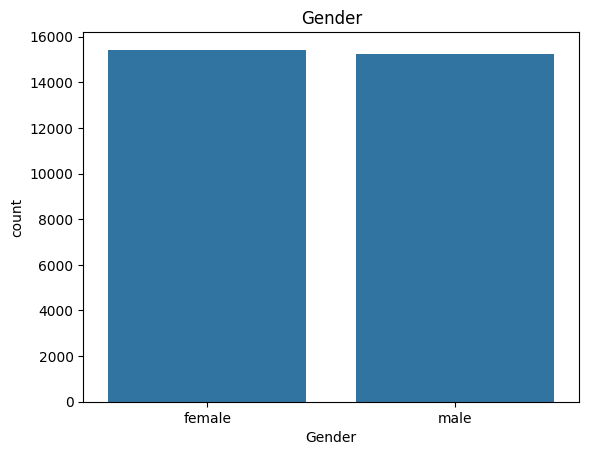

In [ ]:
sns.countplot(x=df['Gender'])
plt.title('Gender');

In [ ]:
df.groupby(['Gender'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)

<ipython-input-643-375783ec7238>:1: FutureWarning: The provided callable <function mean at 0x7b507e732160> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(['Gender'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)


,MathScore,ReadingScore,WritingScore
Gender,,,
female,64.080654,72.853216,72.856457
male,69.069856,65.854571,63.920418


**3) EthnicGroup** - Этническая группа учащегося (представлена анонимно, в формате "Group <...>", представлены 5 различных групп).

Тип переменной: Категориальная (номинальная).

Тип данных в колонке: <class 'float'>

In [ ]:
df['EthnicGroup'] = df['EthnicGroup'].astype(str) # изменим тип данных на строковый

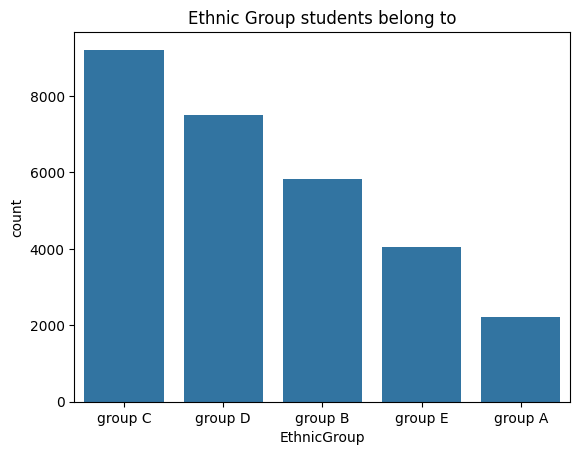

In [ ]:
sns.countplot(x=df['EthnicGroup'], \
              order=['group C', 'group D', 'group B', 'group E', 'group A'])
plt.title('Ethnic Group students belong to');

**4) ParentEduc** - Уровень образования родителей.

Тип переменной: Категориальная (порядковая).

Тип данных в колонке: <class 'str'>

<Axes: title={'center': 'Parent(s) Education Level'}, xlabel='ParentEduc'>

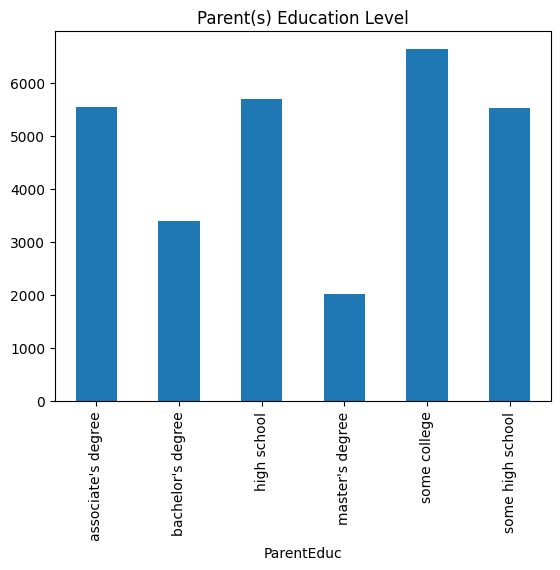

In [ ]:
df.groupby('ParentEduc').size().plot(kind='bar',title='Parent(s) Education Level')

В датасете представлены шесть типов образовательного бекграунда родителей учащихся, начиная с магистра образования (master's degree) до людей, не окончивших старшую школу (some high school), сделаем график более удобным к визуальному восприятию и пониманию процентного соотношения:

<Axes: title={'center': 'Parent(s) Education Level'}, xlabel='ParentEduc'>

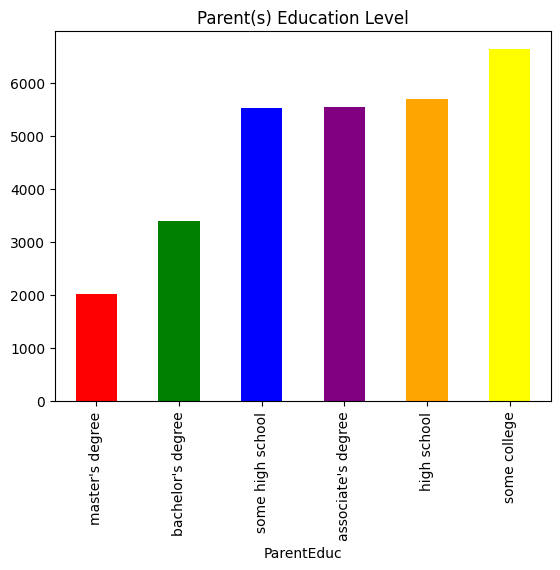

In [ ]:
colors = ['red', 'green', 'blue', 'purple', 'orange', "yellow"]
df.groupby('ParentEduc').size().sort_values().plot(kind='bar',title='Parent(s) Education Level', color=colors)

**5) LunchType** - Тип обеда в школе по стоимости для учащегося ("standard" - обычный или "free/reduced" - со скидкой).

Тип данных в колонке: <class 'str'>

<Axes: title={'center': 'Lunch Payment Type'}, xlabel='LunchType'>

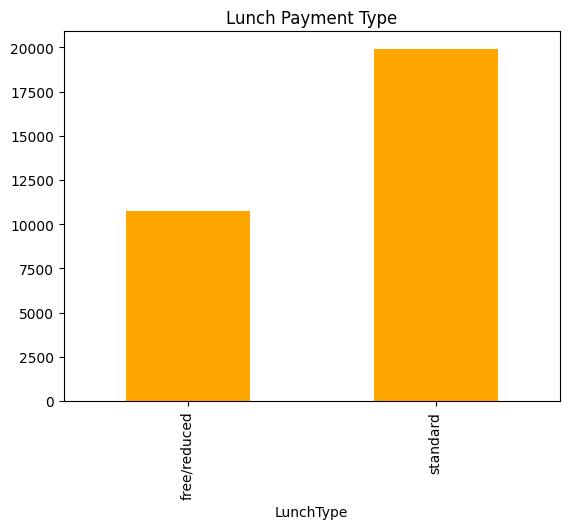

In [ ]:
df.groupby('LunchType').size().plot(kind='bar',title='Lunch Payment Type', color="orange")

Тип переменной: Категориальная (бинарная, так как может быть только 2 варианта (видим по столбчатой диаграмме): либо обед по полной стоимости, либо со скидкой).

**6) TestPrep** - Прошел ли учащийся курс подготовки к тестам ("none"/"completed").

Тип данных в колонке: <class 'str'>

<Axes: title={'center': 'Test Preparation Level'}, xlabel='TestPrep'>

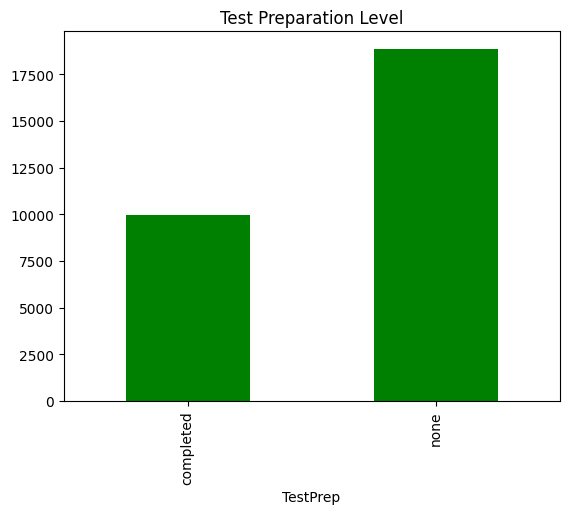

In [ ]:
df.groupby('TestPrep').size().plot(kind='bar',title='Test Preparation Level', color="green")

Тип переменной: Категориальная (бинарная, так как может быть только 2 варианта (видим по столбчатой диаграмме): либо курс пройден, либо нет).

**7) ParentMaritalStatus** - Семейное положение родителей.

Тип переменной: Категориальная (номинальная).

Тип данных в колонке: <class 'str'>

<Axes: title={'center': 'Parent Marital Status'}, xlabel='ParentMaritalStatus'>

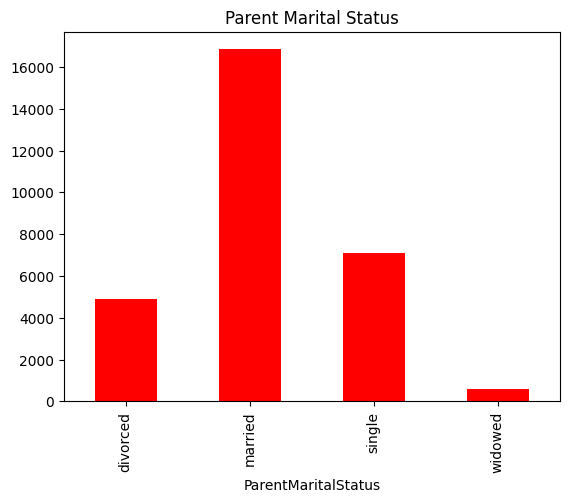

In [ ]:
df.groupby('ParentMaritalStatus').size().plot(kind='bar',title='Parent Marital Status', color="red")

**8) PracticeSport** - Занимается ли учащийся спортом ("regularly", "sometimes", "never").

Тип переменной: Категориальная (порядковая, так как можно ранжировать по частоте занятия спортом: "never" -> "sometimes" -> "regularly").

Тип данных в колонке: <class 'str'>

<Axes: title={'center': 'Practice Sport Frequency'}, xlabel='PracticeSport'>

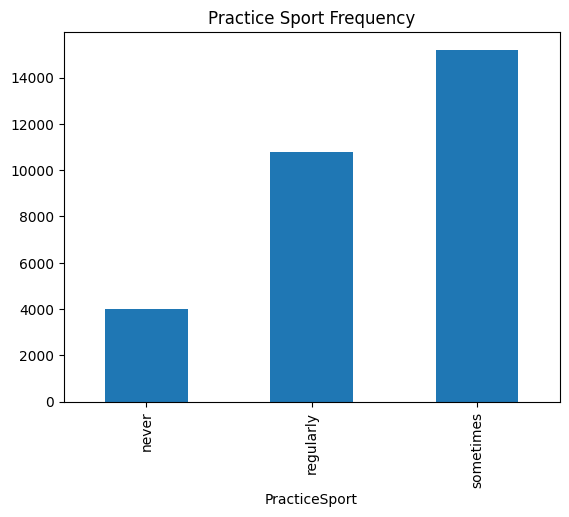

In [ ]:
df.groupby('PracticeSport').size().plot(kind='bar',title='Practice Sport Frequency')

**9) IsFirstChild** - Является ли учащийся первым ребенком в семье ("yes", "no").

Тип переменной: Категориальная (бинарная).

Тип данных в колонке: <class 'str'>

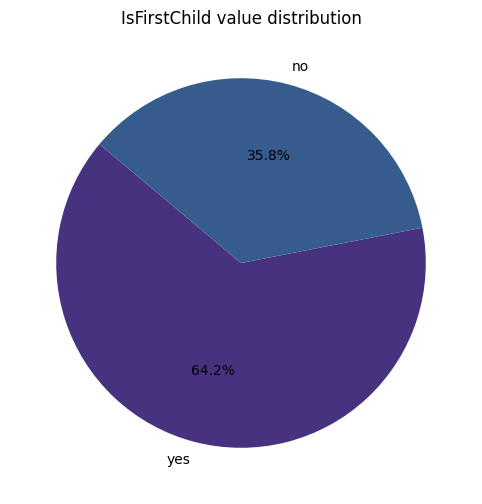

In [ ]:
counts = df['IsFirstChild'].value_counts()


plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('IsFirstChild value distribution')
plt.show()

**10) NrSiblings** - Количество братьев и сестер у учащегося.

Тип переменной: Метрическая (дискретная).

Тип данных в колонке: <class 'numpy.float64'>, можно заменить на целочисленный, но тогда как-то заполнить пропущенные значения, которых около 5% от количества данных.

<ipython-input-653-0d7bda527c05>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='NrSiblings', palette='viridis')


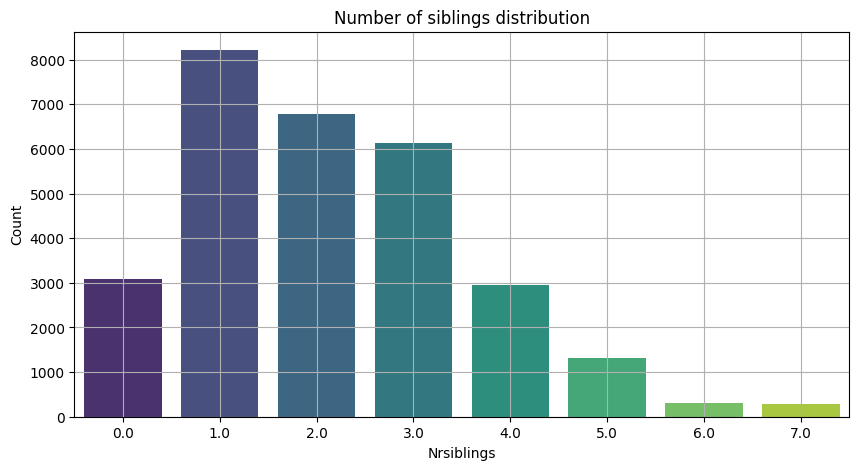

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='NrSiblings', palette='viridis')
plt.title('Number of siblings distribution')
plt.xlabel('Nrsiblings')
plt.ylabel('Count')
plt.grid(True)
plt.show()

**11) TransportMeans** - Способ передвижения в школу.

Тип данных в колонке: <class 'str'>

<Axes: title={'center': 'Transport Means'}, xlabel='TransportMeans'>

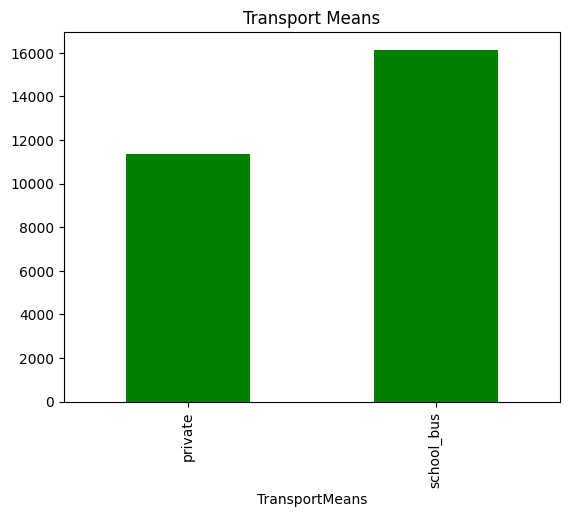

In [ ]:
df.groupby('TransportMeans').size().plot(kind='bar',title='Transport Means', color="green")

Тип переменной: Категориальная (бинарная, так как может быть только 2 варианта (видим по столбчатой диаграмме): либо школьный автобус, либо частный транспорт).

**12) WklyStudyHours** - Количество часов в неделю, которое учащийся тратит на учебу.

Тип данных в колонке: <class 'str'>

<Axes: title={'center': 'Weekly Study Hours'}, xlabel='WklyStudyHours'>

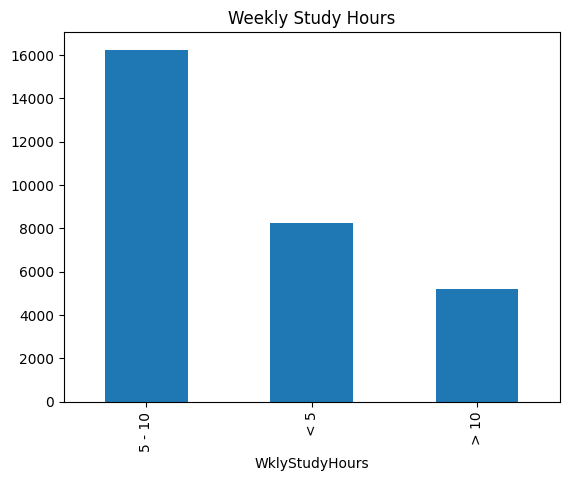

In [ ]:
df.groupby('WklyStudyHours').size().plot(kind='bar',title='Weekly Study Hours')

Тип переменной: Категориальная (порядковая), хотя, по названию, можно определить как метрическую, однако, она изначально переведена в категориальную.

**13) MathScore** - Оценка учащегося по математике (в баллах).

Тип переменной: Метрическая (непрерывная).

Тип данных в колонке: <class 'numpy.int64'>



---



**14) ReadingScore** - Оценка учащегося по чтению (в баллах).

Тип переменной: Метрическая (непрерывная).

Тип данных в колонке: <class 'numpy.int64'>


---




**15) WritingScore** - Оценка учащегося по письму (в баллах).

Тип переменной: Метрическая (непрерывная).

Тип данных в колонке: <class 'numpy.int64'>


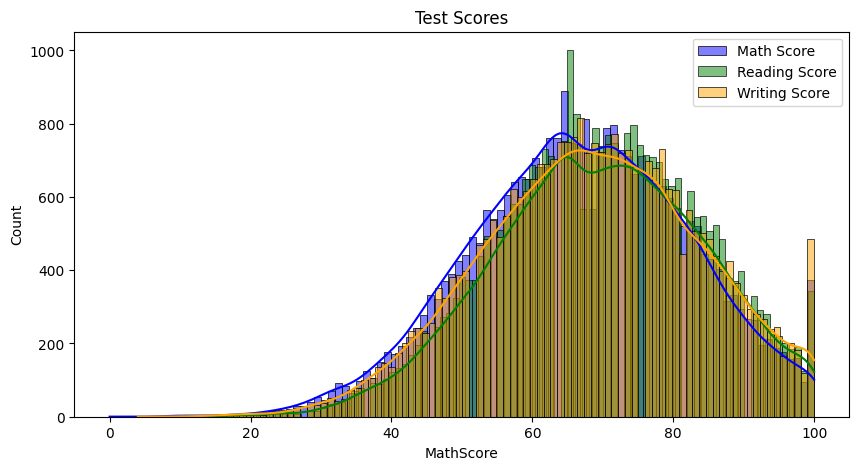

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(df['MathScore'], bins=100, kde=True, color='blue', label='Math Score', ax=ax)
sns.histplot(df['ReadingScore'], bins=100, kde=True, color='green', label='Reading Score', ax=ax)
sns.histplot(df['WritingScore'], bins=100, kde=True, color='orange', label='Writing Score', ax=ax)

plt.title('Test Scores')
plt.legend()
plt.show()

In [ ]:
# Процент пропущенных значений по переменным, содержащим пропуски
missing = (df.isna().sum() / len(df)) * 100
missing = missing[missing > 0].sort_values(ascending=False)
missing = pd.DataFrame({'Процент пропущенных значений' : missing})
missing

,Процент пропущенных значений
TransportMeans,10.228126
ParentEduc,6.021344
TestPrep,5.972390
NrSiblings,5.130381
ParentMaritalStatus,3.883685
WklyStudyHours,3.116739
IsFirstChild,2.950295
PracticeSport,2.059332


### Добавление столбцов:

In [ ]:
# Рассчет нового столбца TotalScore - общее количество баллов за экзамены
df['TotalScore'] = df['MathScore'] + df['ReadingScore'] + df['WritingScore']

# Рассчет нового столбца AverageScore - средний балл за три экзамена
df['AverageScore'] = df[['MathScore', 'ReadingScore', 'WritingScore']].mean(axis=1)

# Рассчет нового столбца PassFail - пройден ли экзамен успешно
# (устанавливаем порог - 60 баллов в качестве среднего балла и не менее 40 баллов по каждому предмету)

def determine_pass_fail(row):
    if row['MathScore'] >= 40 and row['ReadingScore'] >= 40 and row['WritingScore'] >= 40 and row['AverageScore'] >= 60:
        return 'Pass'
    else:
        return 'Fail'

df['PassFail'] = df.apply(determine_pass_fail, axis=1)

# Рассчет нового столбца IsFromBigFamily - категориальная переменная, показывающая, из многодетной ли семьи ребенок (>=2 siblings)
df['IsFromBigFamily'] = df['NrSiblings'].apply(lambda x: 'yes' if x >= 2 else 'no')

In [ ]:
df.head(3)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,TotalScore,AverageScore,PassFail,IsFromBigFamily
0,female,nan,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,216,72.000000,Pass,yes
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,247,82.333333,Pass,no
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,271,90.333333,Pass,yes


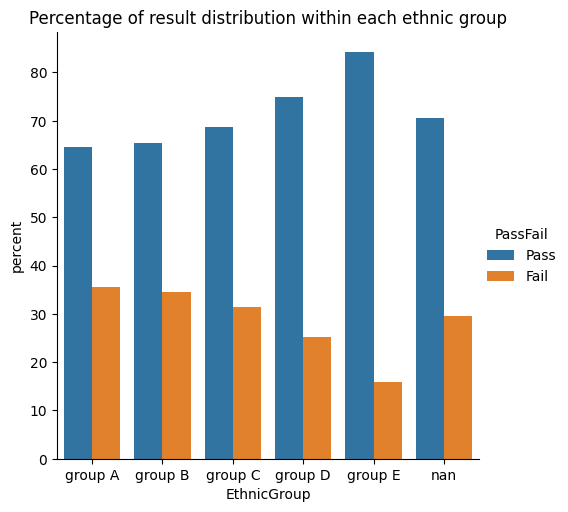

In [ ]:
x, y = 'EthnicGroup', 'PassFail'
df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()\
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')
plt.title('Percentage of result distribution within each ethnic group');

Этнические группы представлены анонимно (угадать реальные значения мы не пытались), чтобы исследование не несло дискриминационный характер. Но по графику видно, что различие между представителями разных этнических групп точно есть. В группе Е и D проваливших экзамен учеников меньше всего по отношению к написавшим успешно.

Перекодируем метрическую переменную TotalScore в категориальную переменную, оценивающую результат учеников за экзамены. Чтобы выбрать границы определния групп, разделим по перцентилю, но для визуализации посмотрим на гистограмму:

<Axes: >

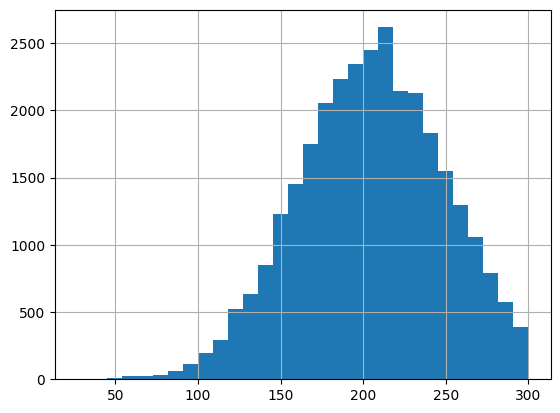

In [ ]:
df.TotalScore.hist(bins=30)

Судя по разбросу данных, балл около 250 и выше может считаться высоким. Распределение в целом нормальное, но очень высоких резульататов относительно много. Можно определить, что 150 до 250 - средний балл, ниже 150 - низкий. Но чтобы не ставить границы случайными числами, будем ориентироваться и на процентное соотношение групп:

In [ ]:
thresholds = []
quantiles = [0.95, 0.8, 0.2, 0.05]
for q in quantiles:
    thresholds += [df['TotalScore'].quantile(q)]

print(thresholds)

[275.0, 243.0, 167.0, 131.0]


In [ ]:
# Функция для перекодировки
def categorize_math_score(score):
    if score < 131:
        return 'SuperLow'
    elif 131 <= score < 167:
        return 'Low'
    elif 167 <= score < 243:
        return 'Medium'
    elif 243 <= score < 275:
        return 'High'
    else:
        return 'SuperHigh'

df['ScoreCategory'] = df['TotalScore'].apply(categorize_math_score)

df.head(3)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,TotalScore,AverageScore,PassFail,IsFromBigFamily,ScoreCategory
0,female,nan,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,216,72.000000,Pass,yes,Medium
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,247,82.333333,Pass,no,High
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,271,90.333333,Pass,yes,High


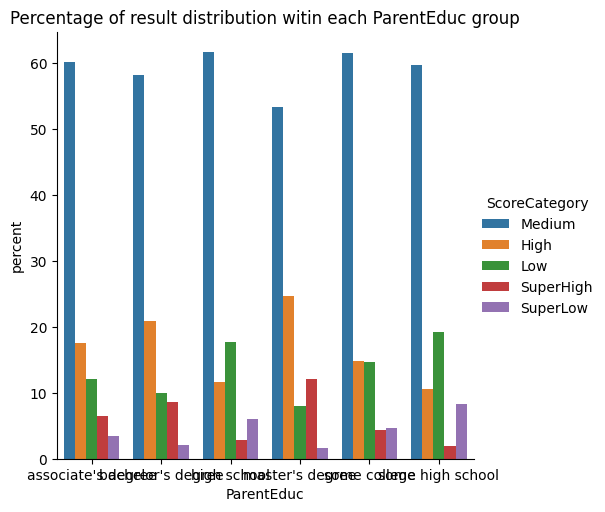

In [ ]:
x, y = 'ParentEduc', 'ScoreCategory'
df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()\
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')
plt.title('Percentage of result distribution witin each ParentEduc group');

У учеников, имеющих родителей магистров высокий результат встречается гораздо чаще, чем у учеников, у которых родители не продолжили образование после старшей школы или не закончили ее вовсе.

### Цели и задачи исследования:

**Цель нашего исследования** заключается в анализе успеваемости учащихся и выявлении факторов, влияющих на их академические достижения. Исследование направлено на понимание взаимосвязей между различными переменными, такими как пол, этническая принадлежность, уровень образования родителей и другие социально-экономические факторы, с целью разработки рекомендаций для улучшения образовательных практик.


---


В используемом датасете содержится множество дополнительной информации о социальном происхождении учеников, что позволит более глубоко рассмотреть все факторы, влияющие на успех при сдаче экзаменов.


---



**Задачи исследования:**

Исследование взаимосвязей между переменными:

1) Проанализировать влияние различных факторов (пол, этническая группа, уровень образования родителей и т.д.) на успеваемость учащихся.

2) Использовать статистические методы (например, линейная регрессия) для проверки гипотез о наличии значимых различий между группами.

3) Исследовать корреляции между оценками по различным предметам и другими переменными (например, количество часов учебы в неделю).

4) Определить факторы, способствующие повышению успеваемости.


---



На основе полученных результатов **сформулировать рекомендации для педагогов и образовательных учреждений по улучшению учебного процесса**.

Предложить стратегии поддержки учащихся с низкими оценками и способы повышения мотивации к обучению.


---



Мы считаем, что результаты помогут выявить сильные и слабые стороны образовательного процесса и предложить пути его улучшения.

### Гипотезы

- H1: Ученики, чьи родители имеют высшее образование, демонстрируют более высокие академические результаты по сравнению с теми, чьи родители имеют среднее образование.
- H2: Ученики из определённых этнических групп имеют более высокие средние баллы по математике и гуманитарным предметам по сравнению с другими группами.
- H3: Ученики, которые регулярно занимаются спортом, имеют более высокие академические результаты по сравнению с теми, кто не занимается спортом.
- H4: Ученики, которые тратят больше часов на учёбу в неделю, имеют более высокие академические результаты.
- H5: Некоторые ученики имеют значительно более высокие баллы по математике, чем другие, при этом могут иметь баллы по чтению и письму ниже.
- H6: Ученики из полных семей имеют более высокие академические результаты по сравнению с теми, чьи родители разведены или одиноки.
- H7: Ученики, которые получают стандартный обед, имеют более высокие академические результаты по сравнению с теми, кто получает бесплатное питание или питание со скидкой.
- H8: Ученики из семей с меньшим количеством детей имеют более высокие академические результаты, так как получают больше внимания и ресурсов от родителей.

### Интересные графики и таблицы анализа взаимосвязей

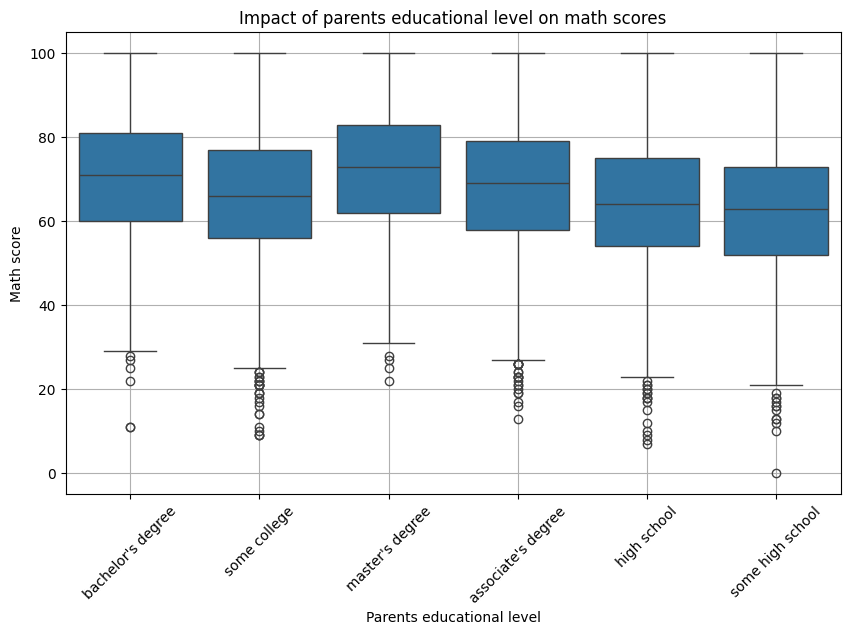

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ParentEduc', y='MathScore', data=df)
plt.title('Impact of parents educational level on math scores')
plt.xlabel('Parents educational level')
plt.ylabel('Math score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

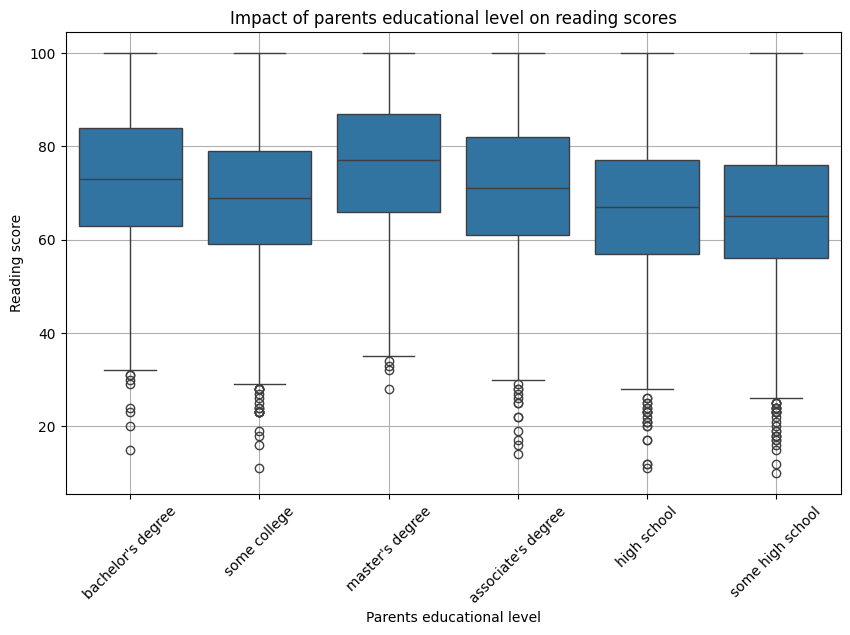

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ParentEduc', y='ReadingScore', data=df)
plt.title('Impact of parents educational level on reading scores')
plt.xlabel('Parents educational level')
plt.ylabel('Reading score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

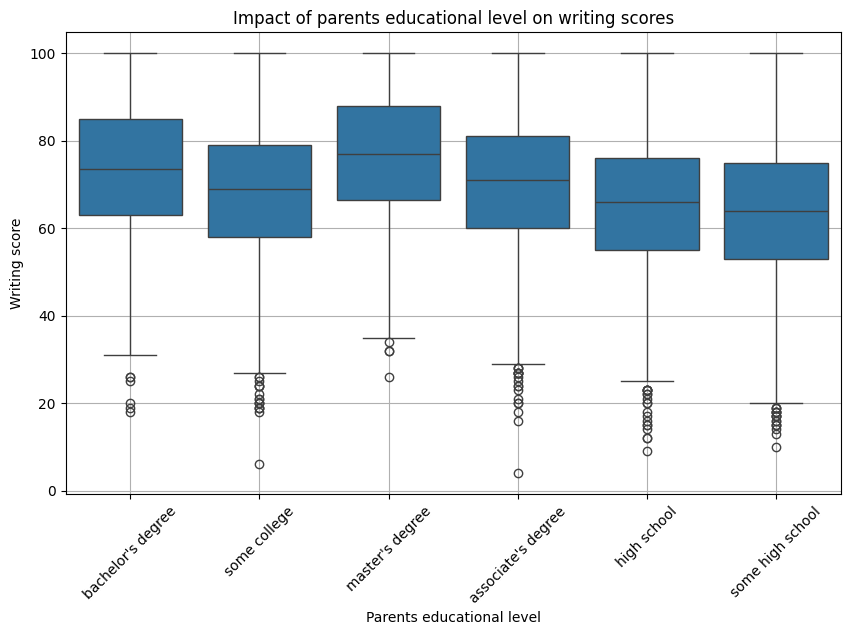

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ParentEduc', y='WritingScore', data=df)
plt.title('Impact of parents educational level on writing scores')
plt.xlabel('Parents educational level')
plt.ylabel('Writing score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

По всем трем результатам оценка за экзамен ученика напрямую коррелирует со степенью образования родителя (родителей).

<ipython-input-668-f481a67faed8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='EthnicGroup', y='MathScore', palette='Set2')


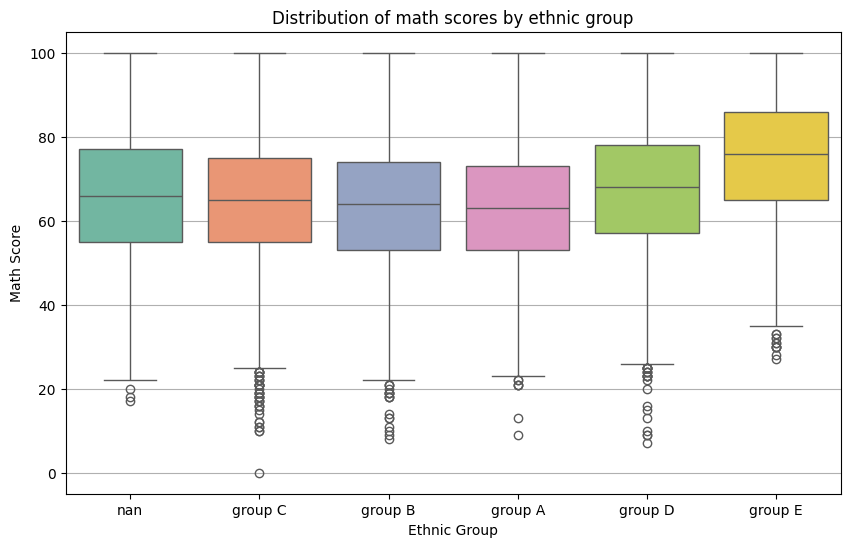

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='EthnicGroup', y='MathScore', palette='Set2')
plt.title('Distribution of math scores by ethnic group')
plt.xlabel('Ethnic Group')
plt.ylabel('Math Score')
plt.grid(axis='y')
plt.show()


<ipython-input-669-4fd9fa6ecb12>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='EthnicGroup', y='ReadingScore', palette='Set3')


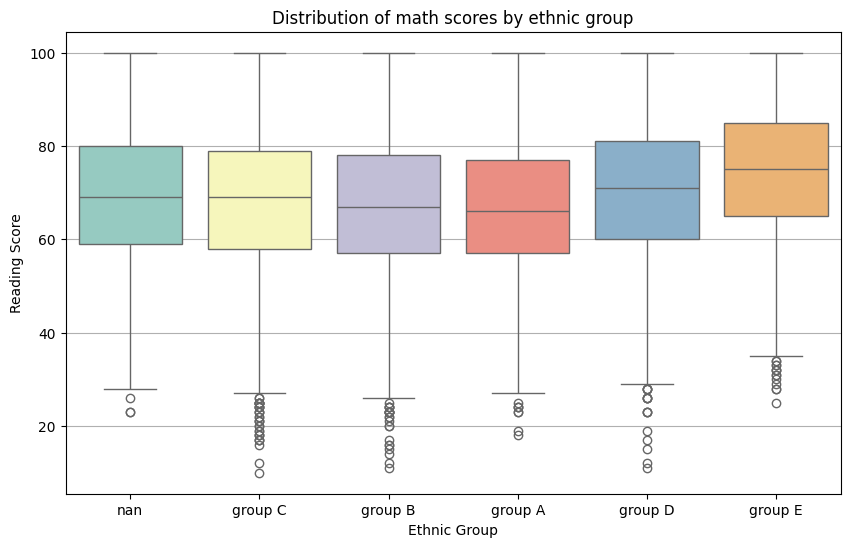

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='EthnicGroup', y='ReadingScore', palette='Set3')
plt.title('Distribution of math scores by ethnic group')
plt.xlabel('Ethnic Group')
plt.ylabel('Reading Score')
plt.grid(axis='y')
plt.show()

<ipython-input-670-35cee4f86721>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='EthnicGroup', y='WritingScore', palette='Set1')


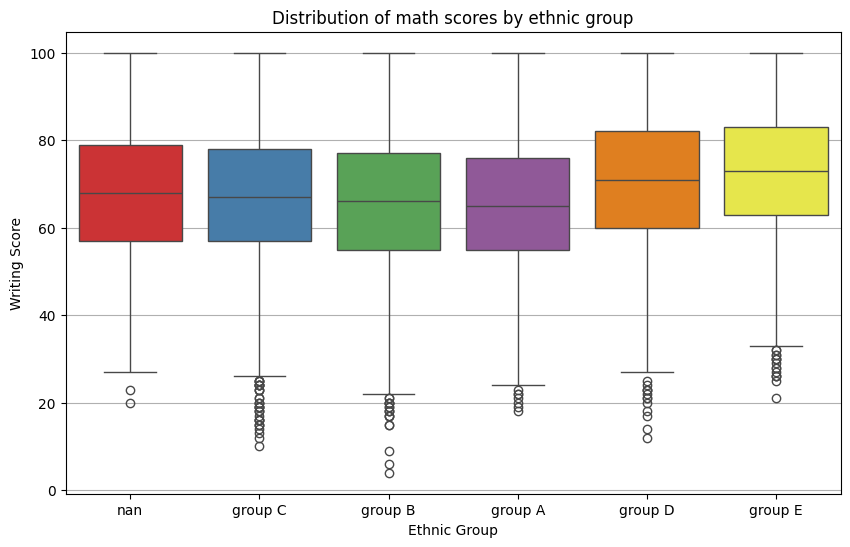

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='EthnicGroup', y='WritingScore', palette='Set1')
plt.title('Distribution of math scores by ethnic group')
plt.xlabel('Ethnic Group')
plt.ylabel('Writing Score')
plt.grid(axis='y')
plt.show()

По всем трем предметам представителей этнических групп можно одинаково отсортировать в порядке от самых высоких результатов (группа E) до самых низких (группа А). Такой ситуации, чтоюы одна этническая группа превосходила другие по результатам математического теста, но была в отстающих по результатам чтения или письма нет. По трем предметам группы расположены в одинаковом порядке.

In [ ]:
df.groupby(['Gender', 'ParentEduc'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean).style.background_gradient(cmap='Reds')

<ipython-input-671-c7e9092988ef>:1: FutureWarning: The provided callable <function mean at 0x7b507e732160> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(['Gender', 'ParentEduc'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean).style.background_gradient(cmap='Reds')


В целом, девушки показывают высокие результаты в чтении и письме по сравнению с математикой, а парни наоборот. Также подтверждена связь с уровнем образования родителей

In [ ]:
df.groupby(['EthnicGroup', 'LunchType'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean).style.background_gradient(cmap='Blues')

<ipython-input-672-630ec677d0e1>:1: FutureWarning: The provided callable <function mean at 0x7b507e732160> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(['EthnicGroup', 'LunchType'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean).style.background_gradient(cmap='Blues')


Студенты, которые получают обед со скидкой или бесплатно показывают худшие результаты. Скорее всего, это связано с социально-экономическом статусом семьи учащегося.

In [ ]:
df.groupby(['PracticeSport', 'WklyStudyHours'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean).style.background_gradient(cmap='Greens')

<ipython-input-673-e4d3d2ef5fcb>:1: FutureWarning: The provided callable <function mean at 0x7b507e732160> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(['PracticeSport', 'WklyStudyHours'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean).style.background_gradient(cmap='Greens')


 Учащиеся, которые учатся больше 10 часов в неделю, показывают более высокие результаты по всем предметам, независимо от того, как часто они занимаются спортом. Тут все логично.

 Учащиеся, которые регулярно занимаются спортом, в целом показывают лучшие результаты, чем те, кто занимается спортом иногда или никогда.

Учащиеся, которые никогда не занимаются спортом и учатся менее 5 часов в неделю, демонстрируют самые низкие баллы.

In [ ]:
df.groupby(['Gender', 'PracticeSport'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean).style.background_gradient(cmap='Purples')

<ipython-input-674-53259e792012>:1: FutureWarning: The provided callable <function mean at 0x7b507e732160> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(['Gender', 'PracticeSport'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean).style.background_gradient(cmap='Purples')


Регулярные занятия спортом способствуют повышению успеваемости как у мужчин, так и у женщин, а учащиеся, никогда не занимающиеся спортом, показывают наименьшие результаты.

In [ ]:
df.groupby(['IsFirstChild', 'Gender', 'NrSiblings'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean).style.background_gradient(cmap='Oranges')

<ipython-input-675-6fab2bb5b1d4>:1: FutureWarning: The provided callable <function mean at 0x7b507e732160> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(['IsFirstChild', 'Gender', 'NrSiblings'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean).style.background_gradient(cmap='Oranges')


Увеличение количества братьев и сестер может негативно влиять на успеваемость в математике, а первые дети в семье часто имеют более высокие баллы по всем предметам, что может быть связано с дополнительным вниманием родителей.

### Описательная статистика

In [ ]:
df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore,TotalScore,AverageScore
count,29069.000000,30641.000000,30641.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622,204.354558,68.118186
std,1.458242,15.361616,14.758952,15.443525,43.362980,14.454327
min,0.000000,0.000000,10.000000,4.000000,27.000000,9.000000
25%,1.000000,56.000000,59.000000,58.000000,175.000000,58.333333
50%,2.000000,67.000000,70.000000,69.000000,205.000000,68.333333
75%,3.000000,78.000000,80.000000,79.000000,236.000000,78.666667
max,7.000000,100.000000,100.000000,100.000000,300.000000,100.000000


In [ ]:
mean_math = df['MathScore'].mean()
median_math = df['MathScore'].median()
mode_math = df['MathScore'].mode()[0]
std_dev_math = df['MathScore'].std()
range_math = df['MathScore'].max() - df['MathScore'].min()

print(f"Среднее: {mean_math}, Медиана: {median_math}, Мода: {mode_math}, Стандартное отклонение: {std_dev_math}, Размах: {range_math}")

Среднее: 66.5584021409223, Медиана: 67.0, Мода: 64, Стандартное отклонение: 15.3616156153448, Размах: 100


In [ ]:
grouped_data = df.groupby('Gender')['MathScore'].agg(['mean', 'median', 'count', 'std', 'min', 'max'])
print(grouped_data)


             mean  median  count        std  min  max
Gender                                               
female  64.080654    64.0  15424  15.238172    0  100
male    69.069856    69.0  15217  15.076223    7  100


### Корреляции

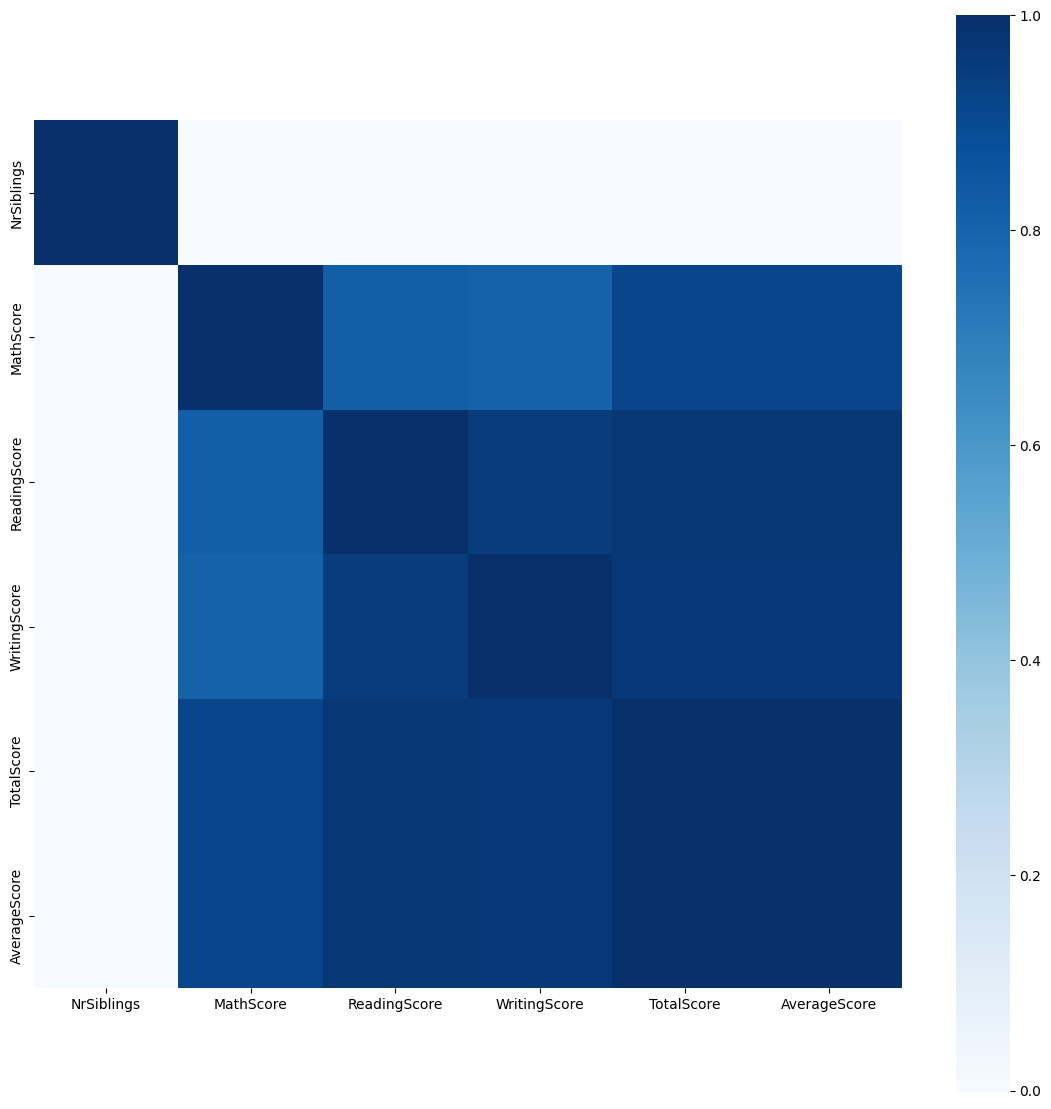

In [ ]:
corr = df.corr(numeric_only=True) # только между числовыми данными
plt.figure(figsize=(14, 14))
sns.heatmap(corr, vmax=1, square=True, cmap='Blues')
plt.show()

Числовых переменных в датасете немного, в целом это только баллы за экзамены (между баллами за конкретный предмет и суммой баллов, очевидно, очень сильная зависимость) и число детей в семье.

In [ ]:
education_mapping = {
    "some high school": 1,
    "high school": 2,
    "some college": 3,
    "bachelor's degree": 5,
    "master's degree": 6,
    "associate's degree" : 4
}

#passfail_mapping = {
#   "pass": 1,
#   "fail": 0,
#}

#isfrombiffamily_mapping = {
#   "pass": 1,
#   "fail": 0,
#}

# Перекодировка в числовой формат
#df['ParentEduc_Numeric'] = df['ParentEduc'].map(education_mapping)


#df['PassFail_Numeric'] = df['PassFail'].map(passfail_mapping)


#df['IsFromBigFamily_Numeric'] = df['IsFromBigFamily'].map(isfrombiffamily_mapping)

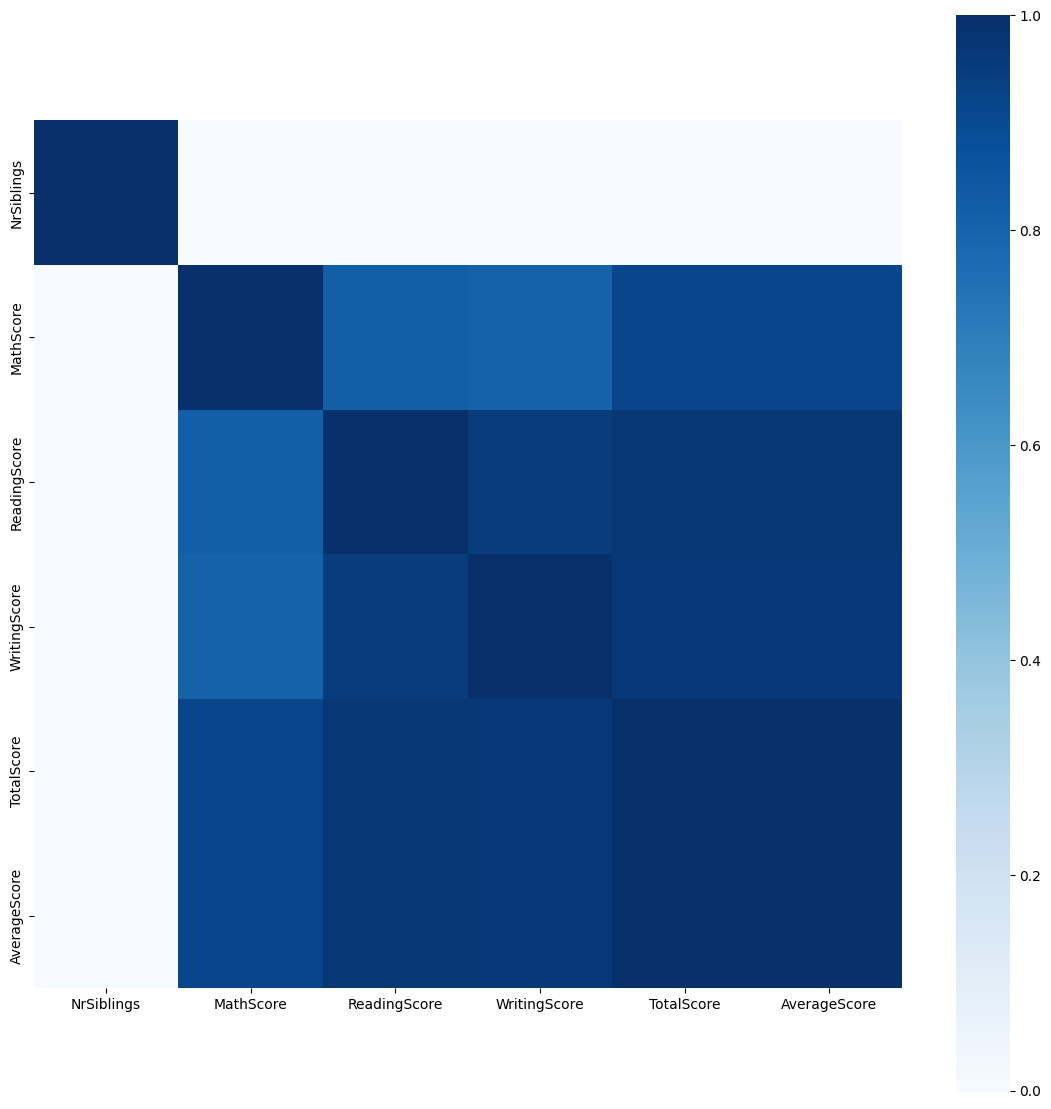

In [ ]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(14, 14))
sns.heatmap(corr, vmax=1, square=True, cmap='Blues')
plt.show()

In [ ]:
df[['TotalScore','WritingScore','ReadingScore','MathScore']].corr()

,TotalScore,WritingScore,ReadingScore,MathScore
TotalScore,1.000000,0.966292,0.969337,0.920061
WritingScore,0.966292,1.000000,0.952584,0.807118
ReadingScore,0.969337,0.952584,1.000000,0.817825
MathScore,0.920061,0.807118,0.817825,1.000000


Учитывая высокую корреляцию между оценками по разным предметам, можно предположить, что улучшение навыков в одной области может способствовать успеху в других областях обучения.

### Линейная регрессия

Зависимая переменная TotalScore

In [ ]:
df['TotalScore'].describe()

,TotalScore
count,30641.000000
mean,204.354558
std,43.362980
min,27.000000
25%,175.000000
50%,205.000000
75%,236.000000
max,300.000000


<ipython-input-684-626dfec31659>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.TotalScore, fit=stats.norm)


<Axes: xlabel='TotalScore', ylabel='Density'>

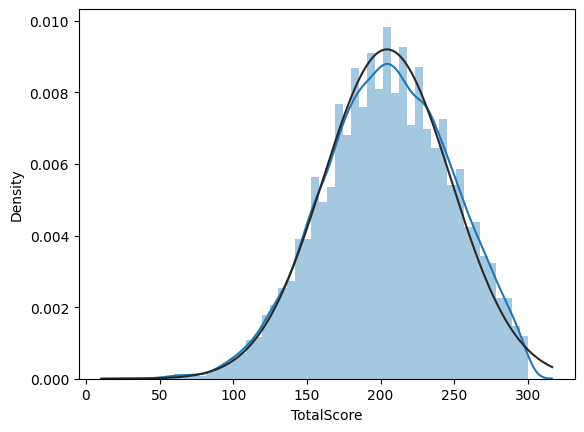

In [ ]:
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import warnings
sns.distplot(df.TotalScore, fit=stats.norm)

In [ ]:
print('Skewness: {:.4f}'.format(df['TotalScore'].skew()))
print('Kurtosis: {:.4f}'.format(df['TotalScore'].kurt()))
print('Quartile Deviation: {:.4f}'.format((df['TotalScore'].quantile(0.75) - df['TotalScore'].quantile(0.25))/2))
print('Decile Ratio: {:.4f}'.format(df['TotalScore'].quantile(0.9)/df['TotalScore'].quantile(0.1)))

Skewness: -0.1849
Kurtosis: -0.2753
Quartile Deviation: 30.5000
Decile Ratio: 1.7635


In [ ]:
df = df.dropna(subset=['TotalScore'])
stats.kstest(df.TotalScore, 'norm', args=(df.TotalScore.mean(), df.TotalScore.std()))

KstestResult(statistic=0.021003273967489466, pvalue=3.574839152102632e-12, statistic_location=227, statistic_sign=-1)

Делаем выводы, что зависимая переменная "TotalScore" демонстрирует в целом нормальное распределение, но есть небольшая пиковость. Среднее значение составляет 204, при этом стандартное отклонение не очень большое — 43. Медиана равна 205, а межквартильная широта составляет 30.

In [ ]:
# корреляции зависимой переменной со всеми остальными по убыванию значений коэффициентов корреляции
df.corrwith(df['TotalScore'], numeric_only=True).sort_values(ascending=False)

,0
TotalScore,1.000000
AverageScore,1.000000
ReadingScore,0.969337
WritingScore,0.966292
MathScore,0.920061
NrSiblings,-0.001631


В основном переменные для анализа будут категориальными, из метрических переменных можем взять MathScore, чтобы оценить, какой вклад оценка по математике несет в итоговую оценку. Остальные оценки в таком случае брать не будем, так как, как выяснено ранее, они имеют между собой высокую корелляцию.

Построим график, чтобы убедиться, что взаимосвязь носит линейный характер и диагностировать выбросы:

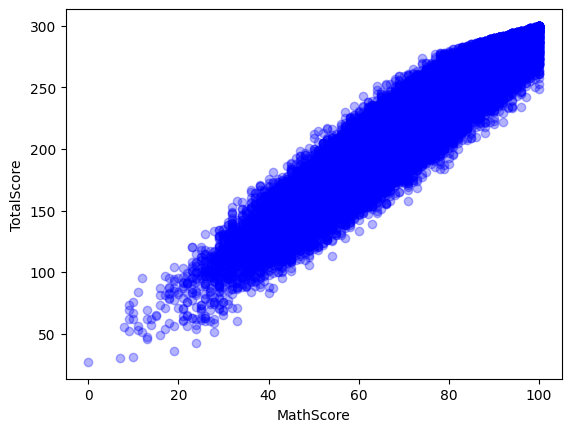

In [ ]:
plt.scatter(df.MathScore, df.TotalScore, c = 'blue', marker = 'o', alpha=0.3)
plt.xlabel('MathScore')
plt.ylabel('TotalScore')
plt.show()

####Категориальные предикторы:

In [ ]:
df['Gender'].value_counts()

,count
Gender,
female,15424
male,15217


In [ ]:
Gender_dummies=pd.get_dummies(df.Gender, prefix='Gender', prefix_sep='_', dtype=int)
Gender_dummies.head()

,Gender_female,Gender_male
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


In [ ]:
df['EthnicGroup'].value_counts() # nan пока не выкидываем

,count
EthnicGroup,
group C,9212
group D,7503
group B,5826
group E,4041
group A,2219
nan,1840


In [ ]:
EthnicGroup_dummies=pd.get_dummies(df.EthnicGroup, prefix='EthnicGroup', prefix_sep='_', dtype=int)
EthnicGroup_dummies.head()

,EthnicGroup_group A,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,EthnicGroup_nan
0,0,0,0,0,0,1
1,0,0,1,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,1,0,0,0


In [ ]:
df['PracticeSport'].value_counts()

,count
PracticeSport,
sometimes,15213
regularly,10793
never,4004


In [ ]:
PracticeSport_dummies=pd.get_dummies(df.PracticeSport, prefix='PracticeSport', prefix_sep='_', dtype=int)
PracticeSport_dummies.head()

,PracticeSport_never,PracticeSport_regularly,PracticeSport_sometimes
0,0,1,0
1,0,0,1
2,0,0,1
3,1,0,0
4,0,0,1


In [ ]:
df['IsFromBigFamily'].value_counts()

,count
IsFromBigFamily,
yes,17767
no,12874


In [ ]:
IsFromBigFamily_dummies=pd.get_dummies(df.IsFromBigFamily, prefix='IsFromBigFamily', prefix_sep='_', dtype=int)
IsFromBigFamily_dummies.head()

,IsFromBigFamily_no,IsFromBigFamily_yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [ ]:
df['TestPrep'].value_counts()

,count
TestPrep,
none,18856
completed,9955


In [ ]:
TestPrep_dummies=pd.get_dummies(df.TestPrep, prefix='TestPrep', prefix_sep='_', dtype=int)
TestPrep_dummies.head()

,TestPrep_completed,TestPrep_none
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
df['WklyStudyHours'].value_counts()

,count
WklyStudyHours,
5 - 10,16246
< 5,8238
> 10,5202


In [ ]:
WklyStudyHours_dummies=pd.get_dummies(df.WklyStudyHours, prefix='WklyStudyHours', prefix_sep='_', dtype=int)
WklyStudyHours_dummies.head()

,WklyStudyHours_5 - 10,WklyStudyHours_< 5,WklyStudyHours_> 10
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [ ]:
df['ParentMaritalStatus'].value_counts()

,count
ParentMaritalStatus,
married,16844
single,7097
divorced,4919
widowed,591


In [ ]:
ParentMaritalStatus_dummies=pd.get_dummies(df.ParentMaritalStatus, prefix='ParentMaritalStatus', prefix_sep='_', dtype=int)
ParentMaritalStatus_dummies.head()

,ParentMaritalStatus_divorced,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [ ]:
df = pd.concat([df, PracticeSport_dummies, Gender_dummies, EthnicGroup_dummies, IsFromBigFamily_dummies, TestPrep_dummies, WklyStudyHours_dummies, ParentMaritalStatus_dummies], axis=1)
df.head(3)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,...,IsFromBigFamily_yes,TestPrep_completed,TestPrep_none,WklyStudyHours_5 - 10,WklyStudyHours_< 5,WklyStudyHours_> 10,ParentMaritalStatus_divorced,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed
0,female,nan,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,...,1,0,1,0,1,0,0,1,0,0
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,...,0,0,0,1,0,0,0,1,0,0
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,...,1,0,1,0,1,0,0,0,1,0


#### Множественная линейная регрессия

In [ ]:
import statsmodels.api as sm
df_model2 = df.dropna(subset=['TotalScore', 'MathScore', 'PracticeSport_never',	'PracticeSport_sometimes','Gender_male', 'EthnicGroup_group B', 'EthnicGroup_group C', 'EthnicGroup_group D', 'EthnicGroup_group E', 'IsFromBigFamily_yes', 'TestPrep_completed', 	'WklyStudyHours_< 5', 'WklyStudyHours_> 10', 'ParentMaritalStatus_single', 'ParentMaritalStatus_divorced', 'ParentMaritalStatus_widowed'])
# PracticeSport_regularly, Gender_female, EthnicGroup_group A, IsFromBigFamily_no, TestPrep_none, WklyStudyHours_5 - 10, ParentMaritalStatus_married - референтные группы
df_model2.shape

(30641, 41)

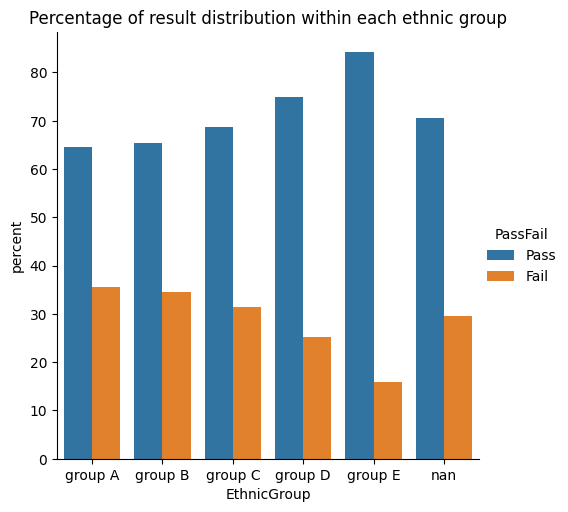

In [ ]:
x, y = 'EthnicGroup', 'PassFail'
df_model2.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()\
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')
plt.title('Percentage of result distribution within each ethnic group');

In [ ]:
df.groupby(['EthnicGroup'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean).style.background_gradient(cmap='Blues')

<ipython-input-742-e7b98fafb5dd>:1: FutureWarning: The provided callable <function mean at 0x7b507e732160> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(['EthnicGroup'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean).style.background_gradient(cmap='Blues')


,MathScore,ReadingScore,WritingScore
EthnicGroup,,,
group A,63.072757,66.807440,65.259300
group B,63.544219,67.402885,65.979511
group C,64.756944,68.576346,67.146711
group D,67.698547,70.509874,70.996409
group E,75.316201,74.369702,72.791704
nan,66.161823,68.924703,67.896962


In [ ]:
df.groupby(['EthnicGroup'])[['TotalScore']].agg(np.mean).style.background_gradient(cmap='Blues')

<ipython-input-749-cdc5a317ff28>:1: FutureWarning: The provided callable <function mean at 0x7b507e732160> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(['EthnicGroup'])[['TotalScore']].agg(np.mean).style.background_gradient(cmap='Blues')


,TotalScore
EthnicGroup,
group A,195.139497
group B,196.926615
group C,200.480000
group D,209.204831
group E,222.477607
nan,202.983487


In [ ]:
x_mult = df_model2[['MathScore', 'PracticeSport_never',	'PracticeSport_sometimes','Gender_male', 'IsFromBigFamily_yes', 'TestPrep_completed', 	'WklyStudyHours_< 5', 'WklyStudyHours_> 10', 'ParentMaritalStatus_single', 'ParentMaritalStatus_divorced', 'ParentMaritalStatus_widowed']]
y = df_model2['TotalScore']
x_mult_constant = sm.add_constant(x_mult)

In [ ]:
model2 = sm.OLS(y, x_mult_constant).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalScore   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 3.831e+04
Date:                Thu, 20 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:03:18   Log-Likelihood:            -1.1774e+05
No. Observations:               30641   AIC:                         2.355e+05
Df Residuals:                   30629   BIC:                         2.356e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
from scipy.stats.mstats import zscore
print(sm.OLS(zscore(y), zscore(x_mult)).fit().summary())
#значения стандартизированных коэффициентов можно сравнивать друг с другом
#можно определить какой из предикторов сильней взаимосвязан с зависимой переменной

                                 OLS Regression Results                                
Dep. Variable:             TotalScore   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                          3.831e+04
Date:                Thu, 20 Feb 2025   Prob (F-statistic):                        0.00
Time:                        20:03:29   Log-Likelihood:                         -2237.7
No. Observations:               30641   AIC:                                      4497.
Df Residuals:                   30630   BIC:                                      4589.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

#### Характеристики модели

In [ ]:
print('R^2 = {:f}'.format(model2.rsquared))
print('F-test significance = {:f}'.format(model2.f_pvalue))

R^2 = 0.932242
F-test significance = 0.000000


Модель статистически значима. Объясняет 93,2% вариации значений зависимой переменной.

In [ ]:
from sklearn.metrics import mean_absolute_error
true_values = df_model2['TotalScore']
predicted_values = model2.fittedvalues
mae = mean_absolute_error(true_values, predicted_values)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 9.002205818118526


In [ ]:
from sklearn.metrics import mean_squared_error
true_values = df_model2['TotalScore']
predicted_values =  model2.fittedvalues
mse = mean_squared_error(true_values, predicted_values)
print('Mean Squared Error:', mse)

Mean Squared Error: 127.40356704584413


In [ ]:
true_values = df_model2['TotalScore']
predicted_values =  model2.fittedvalues
rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 11.28731885993499


In [ ]:
f'Статистически значимые параметры модели: {model2.pvalues[model2.pvalues < 0.05].index.values}'

"Статистически значимые параметры модели: ['const' 'MathScore' 'PracticeSport_never' 'PracticeSport_sometimes'\n 'Gender_male' 'TestPrep_completed' 'WklyStudyHours_< 5'\n 'WklyStudyHours_> 10']"

In [ ]:
f'Статистически не значимые параметры модели: {model2.pvalues[model2.pvalues > 0.05].index.values}'

"Статистически не значимые параметры модели: ['IsFromBigFamily_yes' 'ParentMaritalStatus_single'\n 'ParentMaritalStatus_divorced' 'ParentMaritalStatus_widowed']"

In [ ]:
# уравнение регрессии
l = []
for (param, index) in zip(model2.params[1:], model2.params.index[1:]):
    l.append('{:.2f}*{}'.format(param, index))

print('Y = {:2f} + {}'.format(model2.params[0], ' + '.join(l)))

Y = 33.690257 + 2.70*MathScore + 1.56*PracticeSport_never + 0.46*PracticeSport_sometimes + -24.34*Gender_male + 0.06*IsFromBigFamily_yes + 7.98*TestPrep_completed + 0.98*WklyStudyHours_< 5 + -1.02*WklyStudyHours_> 10 + -0.09*ParentMaritalStatus_single + -0.11*ParentMaritalStatus_divorced + -0.43*ParentMaritalStatus_widowed


<ipython-input-769-088fd316c39b>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Y = {:2f} + {}'.format(model2.params[0], ' + '.join(l)))


#### Интерпретация значений коэффициентов регрессии

Регрессионная модель объясняет 93.2% вариации в общем балле TotalScore (R-squared = 0.932).  Это указывает на то, что модель хорошо описывает факторы, влияющие на успеваемость студентов.  Скорректированный R-squared также равен 0.932, что свидетельствует о том, что включенные предикторы значимо улучшают модель. F-статистика очень высока (3.831e+04) и имеет p-значение, близкое к нулю, что подтверждает общую статистическую значимость модели.

Теперь рассмотрим влияние отдельных предикторов:

**MathScore:**  Каждый дополнительный балл по математике MathScore приводит к увеличению общего балла TotalScore в среднем на 2.6991.  Этот предиктор является статистически значимым (p < 0.001) и оказывает наибольшее влияние на зависимую переменную.

**PracticeSport:** По сравнению со студентами, которые регулярно занимаются спортом, те, кто *никогда* не занимается спортом, имеют TotalScore в среднем на 1.5555 выше (p < 0.001). Студенты, которые занимаются спортом *иногда*, имеют TotalScore в среднем на 0.4643 выше, чем те, кто занимается регулярно (p = 0.001). Однако это не очень значительная разница.

**Gender_male:**  Мужчины в среднем имеют TotalScore на 24.3421 ниже, чем женщины (p < 0.001). Гендерные различия в успеваемости выражены очень ярко.

**IsFromBigFamily_yes:**  Проживание в большой семье не оказывает статистически значимого влияния на TotalScore (p = 0.665).

 **TestPrep_completed:**  Студенты, прошедшие подготовку к тесту, имеют TotalScore в среднем на 7.9827 выше, чем те, кто не проходил (p < 0.001). Подготовка к тесту значительно улучшает результаты.

**WklyStudyHours:** Студенты, занимающиеся менее 5 часов в неделю, имеют TotalScore в среднем на 0.9843 выше, чем студенты, занимающиеся 5-10 часов в неделю (p < 0.001).  В то же время, студенты, занимающиеся более 10 часов в неделю, имеют TotalScore в среднем на 1.0234 ниже, чем те, кто занимается 5-10 часов (p < 0.001). Значительных различий нет.

**ParentMaritalStatus:** Семейное положение родителей не оказывает статистически значимого влияния на TotalScore. Коэффициенты для ParentMaritalStatus_single, ParentMaritalStatus_divorced и ParentMaritalStatus_widowed не являются значимыми (p > 0.05).

MathScore, регулярность занятий спортом, пол, прохождение подготовки к тесту и количество времени, уделяемого учебе, оказывают статистически значимое влияние на общий балл TotalScore.  В то время как размер семьи и семейное положение родителей не являются значимыми предикторами в данной модели.


### Бинарная регрессия

Зависимая переменная:

In [ ]:
passfail_mapping = {
   "Pass": 1,
   "Fail": 0,
}


df['PassFail_Numeric'] = df['PassFail'].map(passfail_mapping)

In [ ]:
df['PassFail_Numeric'].value_counts()

,count
PassFail_Numeric,
1,21883
0,8758


Предикторы:


In [ ]:
LunchType_dummies=pd.get_dummies(df.LunchType, prefix='LunchType', prefix_sep='_', dtype=int)

IsFirstChild_dummies=pd.get_dummies(df.IsFirstChild, prefix='IsFirstChild', prefix_sep='_', dtype=int)

ParentEduc_dummies=pd.get_dummies(df.ParentEduc, prefix='ParentEduc', prefix_sep='_', dtype=int)

TransportMeans_dummies=pd.get_dummies(df.TransportMeans, prefix='TransportMeans', prefix_sep='_', dtype=int)

In [ ]:
#добавляем дамми-переменные в датафрейм
df = pd.concat([df, LunchType_dummies, IsFirstChild_dummies, ParentEduc_dummies, TransportMeans_dummies], axis=1)
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,...,IsFirstChild_no,IsFirstChild_yes,ParentEduc_associate's degree,ParentEduc_bachelor's degree,ParentEduc_high school,ParentEduc_master's degree,ParentEduc_some college,ParentEduc_some high school,TransportMeans_private,TransportMeans_school_bus
0,female,nan,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,...,0,1,0,1,0,0,0,0,0,1
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,...,0,1,0,0,0,0,1,0,0,0
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,...,0,1,0,0,0,1,0,0,0,1
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,...,1,0,1,0,0,0,0,0,0,0
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,...,1,0,0,0,1,0,0,0,0,1
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,...,1,0,0,0,1,0,0,0,1,0
30638,female,nan,high school,free/reduced,completed,married,sometimes,no,1.0,private,...,1,0,0,0,1,0,0,0,1,0
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,...,1,0,1,0,0,0,0,0,0,1


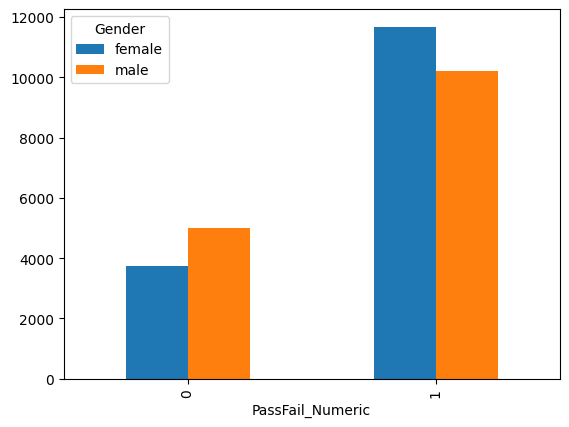

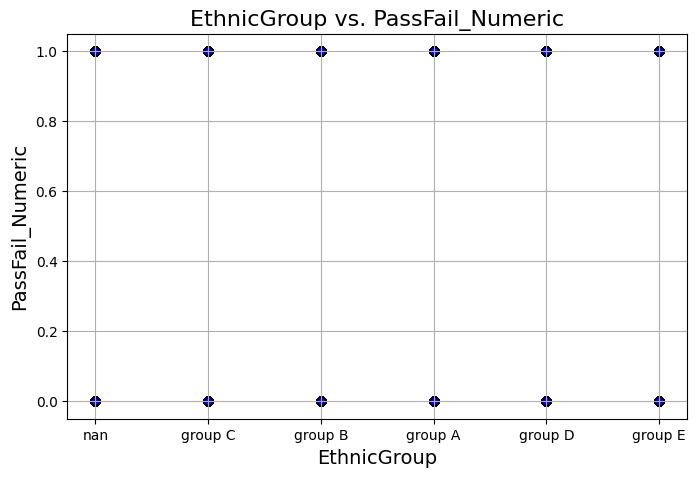

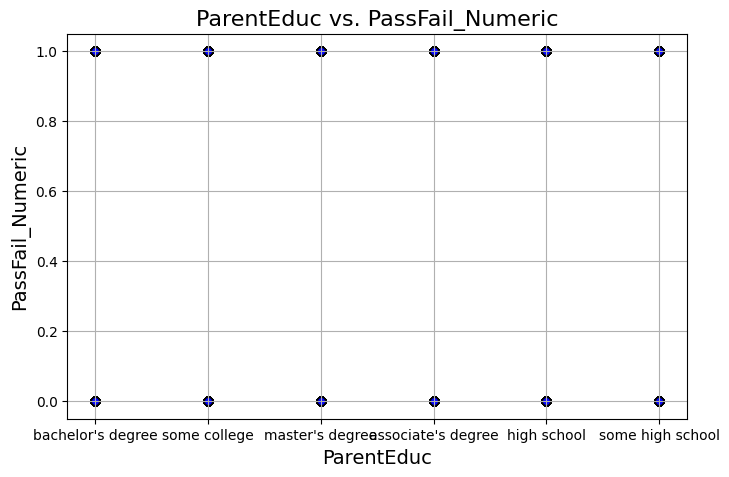

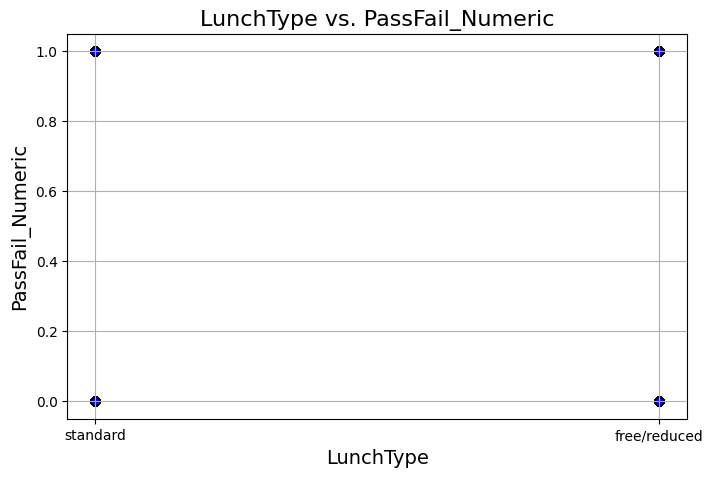

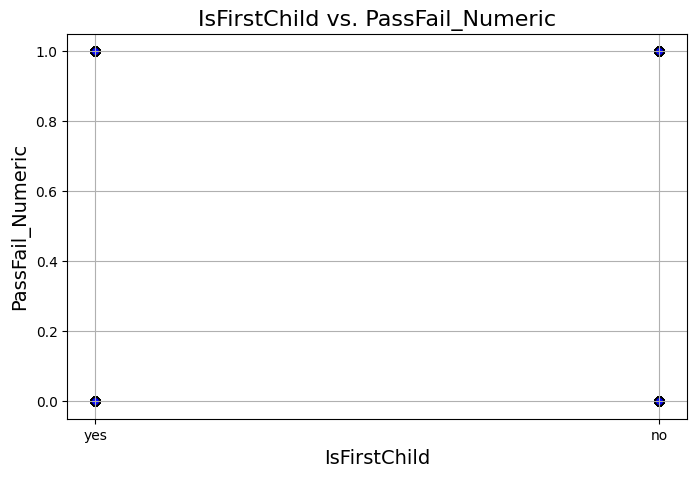

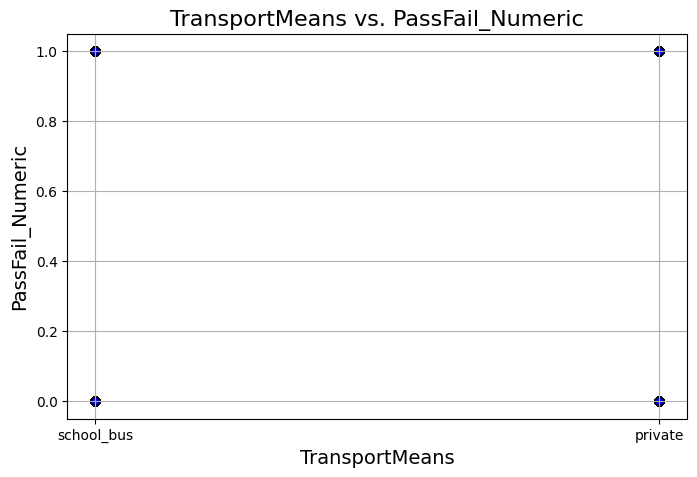

In [ ]:
for c in df.columns[:]:
    if c == 'LunchType' or c == 'IsFirstChild' or c=='ParentEduc' or c=='TransportMeans' or c == 'EthnicGroup':
        plt.figure(figsize=(8,5))
        plt.title('{} vs. PassFail_Numeric'.format(c), fontsize=16)
        df = df.dropna(subset=[c, 'PassFail_Numeric'])

        plt.scatter(x=df[c], y=df['PassFail_Numeric'], color='blue',edgecolor='k')
        plt.grid(True)
        plt.xlabel(c, fontsize=14)
        plt.ylabel('PassFail_Numeric', fontsize=14)
        plt.show()
    elif c == 'Gender':
        ct = pd.crosstab(df['PassFail_Numeric'], df[c])
        ct.plot.bar()

Видим разнообразие в каждой подгруппе предикторов, следовательно, проблем с наличием наблюдей в уникальных подгруппах нет, значит можем их всех оставить.

In [ ]:
df_model1 = df.dropna(subset=['Gender_male', 'IsFirstChild_no','EthnicGroup_group B', 'EthnicGroup_group C', 'EthnicGroup_group D', 'EthnicGroup_group E', "ParentEduc_some high school","ParentEduc_high school","ParentEduc_some college","ParentEduc_master's degree","ParentEduc_bachelor's degree", 'TransportMeans_private', 'LunchType_free/reduced'])
# 'Gender_male', 'IsFirstChild_no', 'EthnicGroup_group A', "ParentEduc_associate's degree", 'TransportMeans_school_bus', 'LunchType_standart' - референтные группы
df_model1.shape

(25104, 54)

In [ ]:
x_mult = df_model1[['Gender_male', 'IsFirstChild_no','EthnicGroup_group B', 'EthnicGroup_group C', 'EthnicGroup_group D', 'EthnicGroup_group E', "ParentEduc_some high school","ParentEduc_high school","ParentEduc_some college","ParentEduc_master's degree","ParentEduc_bachelor's degree", 'TransportMeans_private', 'LunchType_free/reduced']]
y = df_model1['PassFail_Numeric']
x_mult_constant = sm.add_constant(x_mult)
df_model1.head(3)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,...,IsFirstChild_no,IsFirstChild_yes,ParentEduc_associate's degree,ParentEduc_bachelor's degree,ParentEduc_high school,ParentEduc_master's degree,ParentEduc_some college,ParentEduc_some high school,TransportMeans_private,TransportMeans_school_bus
0,female,nan,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,...,0,1,0,1,0,0,0,0,0,1
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,...,0,1,0,0,0,1,0,0,0,1
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,...,0,1,0,0,0,0,1,0,0,1


In [ ]:
x_mult_constant = x_mult_constant.dropna()
y = y.dropna()

In [ ]:
print(x_mult_constant.shape)
print(y.shape)


(25104, 14)
(25104,)


In [ ]:
print(x_mult_constant.dtypes)
print(y.dtype)

const                           float64
Gender_male                       int64
IsFirstChild_no                   int64
EthnicGroup_group B               int64
EthnicGroup_group C               int64
EthnicGroup_group D               int64
EthnicGroup_group E               int64
ParentEduc_some high school       int64
ParentEduc_high school            int64
ParentEduc_some college           int64
ParentEduc_master's degree        int64
ParentEduc_bachelor's degree      int64
TransportMeans_private            int64
LunchType_free/reduced            int64
dtype: object
int64


In [ ]:
model1 = sm.Logit(y, x_mult_constant).fit()
print(model1.summary())

Optimization terminated successfully.
         Current function value: 0.535037
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       PassFail_Numeric   No. Observations:                25104
Model:                          Logit   Df Residuals:                    25090
Method:                           MLE   Df Model:                           13
Date:                Thu, 20 Feb 2025   Pseudo R-squ.:                  0.1034
Time:                        20:00:26   Log-Likelihood:                -13432.
converged:                       True   LL-Null:                       -14980.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.7245      0.058     29.787      0.000

#### Характеристика модели

In [ ]:
print('R^2 = {:f}'.format(model1.prsquared))
print('Model significance = {:f}'.format(model1.llr_pvalue))

R^2 = 0.103354
Model significance = 0.000000


Pseudo R-squ.: 0.1034: Псевдо-R-квадрат (McFadden's R-squared) показывает, что модель объясняет примерно 10.34% вариации в логарифме шансов на успех. Это относительно низкий показатель, что означает, что модель не полностью объясняет определяющие факторы успеха.

Log-Likelihood: -13432.: Логарифм функции правдоподобия для данной модели.

LL-Null: -14980.: Логарифм функции правдоподобия для "нулевой" модели (только константа).

LLR p-value: 0.000: p-значение для теста отношения правдоподобия. Модель статистически значимо лучше, чем нулевая модель.

converged: True: Модель успешно сошлась.

Интерпретация коэффициентов:


Gender_male: -0.5026

Логарифм шансов на успех для мужчин на 0.5026 ниже, чем для женщин.

Отношение шансов (odds ratio) = exp(-0.5026) ≈ 0.605. Это означает, что шансы на успех для мужчин примерно в 0.605 раза (или на 40%) меньше, чем для женщин.
P < 0.001: Статистически значимо.

IsFirstChild_no: -0.0067

Логарифм шансов на успех для не-первых детей на 0.0067 ниже, чем для первых детей.
Отношение шансов (odds ratio) = exp(-0.0067) ≈ 0.993. Практически не влияет на шансы на успех.
 P = 0.830: Статистически не значимо.

 EthnicGroup_group B: -0.0729

Логарифм шансов на успех для группы B на 0.0729 ниже, чем для базовой этнической группы.
Отношение шансов (odds ratio) = exp(-0.0729) ≈ 0.930. Небольшое снижение шансов.
P = 0.151: Статистически не значимо.

EthnicGroup_group C: 0.0813

Логарифм шансов на успех для группы C на 0.0813 выше, чем для базовой этнической группы.
Отношение шансов (odds ratio) = exp(0.0813) ≈ 1.085. Небольшое увеличение шансов.
P = 0.085: Статистически не значимо на уровне 0.05, но близко к этому.

EthnicGroup_group D: 0.4304

Логарифм шансов на успех для группы D на 0.4304 выше, чем для базовой этнической группы.
Отношение шансов (odds ratio) = exp(0.4304) ≈ 1.538. Значительное увеличение шансов.
P < 0.001: Статистически значимо.

EthnicGroup_group E: 1.0769

Логарифм шансов на успех для группы E на 1.0769 выше, чем для базовой этнической группы.
Отношение шансов (odds ratio) = exp(1.0769) ≈ 2.935. Очень значительное увеличение шансов.
P < 0.001: Статистически значимо.

ParentEduc:

ParentEduc_some high school: -0.7985
Отношение шансов (odds ratio) = exp(-0.7985) ≈ 0.450. Значительное снижение шансов.
P < 0.001: Статистически значимо.

ParentEduc_high school: -0.5261
Отношение шансов (odds ratio) = exp(-0.5261) ≈ 0.591. Значительное снижение шансов.
P < 0.001: Статистически значимо.
ParentEduc_some college: -0.2637
Отношение шансов (odds ratio) = exp(-0.2637) ≈ 0.768. Некоторое снижение шансов.
P < 0.001: Статистически значимо.

ParentEduc_master's degree: 0.6331
Отношение шансов (odds ratio) = exp(0.6331) ≈ 1.883. Значительное увеличение шансов.
P < 0.001: Статистически значимо.

ParentEduc_bachelor's degree: 0.3111
Отношение шансов (odds ratio) = exp(0.3111) ≈ 1.365. Увеличение шансов.
P < 0.001: Статистически значимо.

ransportMeans_private: -0.0172

Отношение шансов (odds ratio) = exp(-0.0172) ≈ 0.983. Практически не влияет на шансы на успех.
P = 0.571: Статистически не значимо.

LunchType_free/reduced: -1.2218

Логарифм шансов на успех при льготном питании на 1.2218 ниже, чем при платном питании.
Отношение шансов (odds ratio) = exp(-1.2218) ≈ 0.295. Очень значительное снижение шансов.
P < 0.001: Статистически значимо.

Образование родителей и тип питания - ключевые факторы: Особенно сильно влияют образование родителей ("some high school" значительно снижает шансы, а "master's degree" значительно увеличивает) и наличие льготного питания ("free/reduced lunch" резко снижает шансы на успех). Эти факторы, вероятно, отражают социально-экономический статус, как было подмечено ранее.

Мужчины имеют значительно меньше шансов на успех, чем женщины.

Этнические группы: Группы D и E имеют значительно больше шансов на успех, чем базовая группа (важно определить, какая группа является базовой).


В целом, модель выявляет важные факторы, влияющие на вероятность успеха, однако ее прогностическая способность очень ограничена.


### Кластерный анализ данных

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
import warnings
import scipy.stats as stats
warnings.filterwarnings("ignore")
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Проведём иерархический кластерный анализ данных. Нам нужно выбрать переменные, которые могут отражать схожесть и различия между учениками по их результатам обучения. В данном случае можно выбрать следующие метрические переменные:

MathScore
ReadingScore
WritingScore
Гипотеза: люди имеют технический или гуманирный уклон. Для её проверки создадим новую переменную TechBias, равную MathScore - (ReadingScore + WritingScore) / 2.

In [ ]:
df['TechBias'] = df['MathScore'] - (df['ReadingScore'] + df['WritingScore']) / 2

Теперь проверим данные и подготовим их к проведению кластерного анализа: Переменные не должны коррелировать и должны иметь схожую шкалу измерения.

Чтобы выбрать критерий для определния корреляции, исследуем данные на нормальность. Для нашей выборки больше подходит тест Колмогорова-Смирнова, поскольку размер выборки превышает 50.

In [ ]:
# Проверка на нормальность
for column in ['MathScore', 'ReadingScore', 'WritingScore', 'TechBias']:
    data_clean = df[column].dropna()
    d_statistic, p_value = stats.kstest(data_clean, 'norm', args=(data_clean.mean(), data_clean.std()))
    print(f'Тест Колмогорова-Смирнова для {column}: Статистика={d_statistic:.3f}, p-значение={p_value:.3f}')
    if p_value > 0.05:
        print(f"{column} имеет нормальное распределение (не отклоняем нулевую гипотезу).")
    else:
        print(f"{column} не имеет нормального распределения (отклоняем нулевую гипотезу).")

# Удаление пропущенных значений
df = df.dropna(subset=['MathScore', 'ReadingScore', 'WritingScore', 'TechBias'])

# Стандартизация данных
scaler = StandardScaler()
df[['MathScore', 'ReadingScore', 'WritingScore', 'TechBias']] = scaler.fit_transform(df[['MathScore', 'ReadingScore', 'WritingScore', 'TechBias']])

Данные не распределены нормально, значит, везде можем воспользоваться коэффициетом Спирмена.

In [ ]:
# Проверка корреляции
variables = ['MathScore', 'ReadingScore', 'WritingScore', 'TechBias']
for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        var1 = variables[i]
        var2 = variables[j]
        corr, p = stats.spearmanr(df[var1], df[var2])
        print(f'Коэффициент корреляции Спирмена между {var1} и {var2}: {corr:.3f}')

Видим, что `WritingScore` и `ReadingScore` очень сильно коррелируют, поэтому оставим WritingScore, поскольку она меньше коррелирует с MathScore и TechBias. А вот TechBias слабо коррелирует со всеми переменными, поэтому её хорошо будет рассмотреть.

In [ ]:
# Удаляем ReadingScore
data = df[['MathScore', 'WritingScore', 'TechBias']]

# стандартизируем
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
# Построим дендрограмму по методу Варда (по другим маетодам иерархической
# кластеризщации питон уходит в длинные вычисления и превышает длину рекурсии)
Z = linkage(X, method='ward')
plt.figure(figsize=(15, 10))
dendrogram(Z, labels=df.index, leaf_rotation=90)
plt.title('Дендрограмма по методу Варда')
plt.xlabel('Объекты')
plt.ylabel('Расстояние')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import calinski_harabasz_score
X = data[['MathScore', 'WritingScore', 'TechBias']]

range_n_clusters = range(2, 11)
ch_scores = []

# Вычисление индекса Калински-Харабаша для каждого количества кластеров
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    ch_score = calinski_harabasz_score(X, labels)
    ch_scores.append(ch_score)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, ch_scores, marker='o')
plt.title('Индекс Калински-Харабаша в зависимости от количества кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Индекс Калински-Харабаша')
plt.xticks(range_n_clusters)
plt.grid()
plt.show()

# Оптимальное количество кластеров
optimal_n_clusters = range_n_clusters[np.argmax(ch_scores)]
print(f'Оптимальное количество кластеров: {optimal_n_clusters}')

Видим, что оптимально взять 4 кластера. Это будут люди с техническим уклоном, люди с гуманитарным улоном, 'универсалы' - во всём разбираются хорошо, и ребята, которые всё знают не очень.

### Выводы и рекомендации к подходу к преподаванию

На основе полученных результатов, можно сформулировать следующие выводы и рекомендации для образовательных программ, направленные на повышение успеваемости студентов и устранение выявленных неравенств:

Поддержка студентов из социально-экономически неблагополучных семей:

Вывод: Образование родителей и наличие льготного питания ("free/reduced lunch") являются ключевыми факторами, влияющими на шансы на успех. Низкий уровень образования родителей и льготное питание значительно снижают вероятность успешного обучения.

Рекомендации:

Обеспечение равного доступа к качественному образованию: Разработка и внедрение программ поддержки для студентов из социально-экономически неблагополучных семей, направленных на компенсацию недостатка ресурсов и возможностей.

Предоставление дополнительных образовательных ресурсов: Бесплатные занятия, репетиторство, доступ к учебным материалам и технологиям для студентов, нуждающихся в поддержке.

Социальная и психологическая поддержка: Организация консультаций с психологами и социальными работниками для решения проблем, связанных с социально-экономическим неблагополучием.

Вовлечение родителей: Программы для родителей с низким уровнем образования, направленные на повышение их осведомленности о важности образования и формирование поддерживающей образовательной среды дома.

Устранение гендерных проблем

Вывод: парни имеют значительно меньше шансов на успех, чем девушки.

Рекомендации:

Анализ причин гендерного разрыва: Проведение исследований для выявления факторов, определяющих более низкую успеваемость мужчин (например, влияние социальных стереотипов, особенности обучения, мотивация).

Разработка гендерно-чувствительных образовательных программ: Учет гендерных особенностей при разработке учебных материалов и методик обучения.

Поддержка и мотивация мужчин: Создание программ наставничества и консультирования для мужчин, направленных на повышение их мотивации и уверенности в своих силах.
  
Противодействие гендерным стереотипам: Проведение образовательных мероприятий, направленных на разрушение стереотипов о "мужских" и "женских" предметах и профессиях.

Учет этнических особенностей:

Вывод: Некоторые этнические группы (группы D и E) имеют больше  шансов на успех, чем группа А.

Рекомендации:
  
Анализ причин различий между этническими группами: Выявление факторов, определяющих различия в успеваемости между этническими группами (например, культурные особенности, социально-экономические условия, языковой барьер).

Разработка культурно-ориентированных образовательных программ: Учет культурных особенностей студентов при разработке учебных материалов и методик обучения.

Поддержка студентов, испытывающих трудности: Предоставление дополнительной помощи студентам из этнических групп, испытывающих трудности в обучении.

Создание инклюзивной образовательной среды: Обеспечение уважительного и толерантного отношения ко всем этническим группам.

Оптимизация учебного процесса:

Вывод: MathScore и подготовка к тесту оказывают наибольшее положительное влияние на TotalScore. Эффективное распределение времени на учебу также имеет значение.

Рекомендации:

Улучшение качества обучения математике: Усиление преподавания математики на всех уровнях образования.

Обеспечение доступа к качественной подготовке к тестам: Предоставление бесплатных или доступных программ подготовки к тестам для всех студентов.

Развитие навыков эффективного управления временем: Обучение студентов навыкам планирования и организации учебного времени.

Поощрение разумного подхода к учебе: Акцент на качестве обучения, а не только на количестве часов, проведенных за учебой.

## Часть 2. Сбор данных со страницы https://health-diet.ru/table_calorie/

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://health-diet.ru/table_calorie/'
page = requests.get(url)

soup = BeautifulSoup(page.content, 'html.parser')


In [ ]:
for link in soup.findAll("a"):
    print(link.get("href"))

/
None
/account/login
/base_of_food/food_24507/
/base_of_food/food_24523/
/base_of_food/food_24509/
/base_of_food/food_24502/
/base_of_food/food_24513/
/base_of_food/food_24526/
/base_of_food/food_24515/
/base_of_food/food_24525/
/base_of_food/food_24522/
/base_of_food/food_24519/
/base_of_food/food_24508/
/base_of_food/food_24512/
/base_of_food/food_24517/
/base_of_food/food_24506/
/base_of_food/food_24501/
/base_of_food/food_24527/
/base_of_food/food_24518/
/base_of_food/food_24503/
/base_of_food/food_24528/
/base_of_food/food_24511/
/base_of_food/food_24504/
/base_of_food/food_24514/
/base_of_food/food_24529/
/base_of_food/food_24516/
/base_of_food/food_24524/
/base_of_food/food_24520/
/base_of_meals/meals_21252/
/base_of_meals/meals_21243/
/base_of_meals/meals_21249/
/base_of_meals/meals_21244/
/base_of_meals/meals_21245/
/base_of_meals/meals_21254/
/base_of_meals/meals_21250/
/base_of_meals/meals_21247/
/base_of_meals/meals_21248/
/base_of_meals/meals_21242/
/base_of_meals/meals_2

<ipython-input-727-e1ec2a245813>:1: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  for link in soup.findAll("a"):


In [ ]:
import time
urls = []
for link in soup.findAll("a"):
    if link.get("href"):
        if "/base_of_food/food_24" in link.get("href") and "leftMenu" not in link.get("href"):
            urls.append('https://health-diet.ru' + link.get("href"))
urls # финальный список

<ipython-input-728-cd79654c52d9>:3: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  for link in soup.findAll("a"):


['https://health-diet.ru/base_of_food/food_24507/',
 'https://health-diet.ru/base_of_food/food_24523/',
 'https://health-diet.ru/base_of_food/food_24509/',
 'https://health-diet.ru/base_of_food/food_24502/',
 'https://health-diet.ru/base_of_food/food_24513/',
 'https://health-diet.ru/base_of_food/food_24526/',
 'https://health-diet.ru/base_of_food/food_24515/',
 'https://health-diet.ru/base_of_food/food_24525/',
 'https://health-diet.ru/base_of_food/food_24522/',
 'https://health-diet.ru/base_of_food/food_24519/',
 'https://health-diet.ru/base_of_food/food_24508/',
 'https://health-diet.ru/base_of_food/food_24512/',
 'https://health-diet.ru/base_of_food/food_24517/',
 'https://health-diet.ru/base_of_food/food_24506/',
 'https://health-diet.ru/base_of_food/food_24501/',
 'https://health-diet.ru/base_of_food/food_24527/',
 'https://health-diet.ru/base_of_food/food_24518/',
 'https://health-diet.ru/base_of_food/food_24503/',
 'https://health-diet.ru/base_of_food/food_24528/',
 'https://he

In [ ]:
# изучим страницу
url0 = urls[0]
page0 = requests.get(url0)
soup0 = BeautifulSoup(page0.text, "html")
soup0

<!DOCTYPE html>
<html class="uk-height-1-1">
<head lang="ru">
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="/manifest.json" rel="manifest"/>
<link href="/favicon.svg" rel="icon"/>
<title>Баранина и дичь. Таблица калорийности и химический состав продуктов питания.</title>
<script type="application/javascript">
            window.mzrConfig = {"useWebpack":false,"requirejs":{"baseUrl":"https:\/\/health-diet.ru\/jsApp\/v8.133.92\/","urlArgs":""},"showAlertSanctions":true,"xdebugSessionStart":false,"oneSignal":{"isOnInBrowser":false,"appId":"c021220b-2627-43c4-857d-ae26cc051db2","jsSdkPath":"https:\/\/cdn.onesignal.com\/sdks\/OneSignalSDK.js"},"foodDiaryMacronutrientsVersion":"v2","routeHistory":"browser","appVersion":"v8.133.92","platformId":101,"supportEmail":"support@health-diet.ru","appName":"\u041c\u043e\u0439 \u0437\u0434\u043e\u0440\u043e\u

In [ ]:
titles = []
for url in urls:
    page = requests.get(url)
    soup = BeautifulSoup(page.text, "html")
    title = soup.findAll("title")[0].text
    title = title[:title.index('.')]
    display(title)
    titles.append(title)
    time.sleep(0.5)

<ipython-input-730-146bcaf0a3dc>:5: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  title = soup.findAll("title")[0].text


'Баранина и дичь'

'Бобовые'

'Вода и напитки'

'Говядина и телятина'

'Грибы'

'Детское питание'

'Жиры и масла'

'Кондитерские изделия'

'Крупы, мука, макароны'

'Молочные продукты'

'Напитки алкогольные'

'Овощи и зелень'

'Орехи и семена'

'Полуфабрикаты'

'Птица'

'Ресторанная еда'

'Рыба и морепродукты'

'Свинина'

'Снеки'

'Соки'

'Сосиски и колбаса'

'Травы, специи и соусы'

'Фаст-фуд'

'Фрукты и ягоды'

'Хлеб и выпечка'

'Яйца и продукты из яиц'

In [ ]:
urls_final = dict()
index = 0
for url in urls:
    page = requests.get(url)
    urls2 = []
    soup = BeautifulSoup(page.text, "html")
    for link in soup.findAll("a"):
        if link.get("href"):
            if "/base_of_food/sostav/" in link.get("href"):
                urls2.append('https://health-diet.ru' + link.get("href"))
    urls_final[titles[index]] = urls2 # финальный список
    time.sleep(0.5)
    index += 1
#display(urls_final[titles[0]])

<ipython-input-731-7a998ddf33d9>:7: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  for link in soup.findAll("a"):


In [ ]:
# изучим страницу с конкретным продуктом
title0 = titles[0]
print(title0)
url0 = urls_final[title0][0]
print(url0)
page0 = requests.get(url0)
soup0 = BeautifulSoup(page0.text, "html")
#display(soup0)
display(soup0.findAll("tr"))

Баранина и дичь
https://health-diet.ru/base_of_food/sostav/25183.php


<ipython-input-732-c844e62afee9>:9: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  display(soup0.findAll("tr"))


[<tr>
 <td>Нутриент</td>
 <td>Количество</td>
 <td>Норма**</td>
 <td>% от нормы
                             в 100 г</td>
 <td>% от нормы
                             в 100 ккал</td>
 <td>100% нормы</td>
 </tr>,
 <tr>
 <td class="mzr-tc-chemical-level-1 mzr-tc-chemical-group">Калорийность</td>
 <td><span itemprop="calories">538 ккал</span></td>
 <td>1684 ккал</td>
 <td>31.9%</td>
 <td>5.9%</td>
 <td>313 г</td>
 </tr>,
 <tr>
 <td class="mzr-tc-chemical-level-1">Белки</td>
 <td><span itemprop="proteinContent">16.9 г</span></td>
 <td>76 г</td>
 <td>22.2%</td>
 <td>4.1%</td>
 <td>450 г</td>
 </tr>,
 <tr>
 <td class="mzr-tc-chemical-level-1">Жиры</td>
 <td><span itemprop="fatContent">52.3 г</span></td>
 <td>56 г</td>
 <td>93.4%</td>
 <td>17.4%</td>
 <td>107 г</td>
 </tr>,
 <tr>
 <td class="mzr-tc-chemical-level-1">Вода</td>
 <td>27.1 г</td>
 <td>2273 г</td>
 <td>1.2%</td>
 <td>0.2%</td>
 <td>8387 г</td>
 </tr>,
 <tr>
 <td class="mzr-tc-chemical-level-1">Зола</td>
 <td>0.8 г</td>
 <td>~</td>

In [ ]:
data = []
titles_for_file = ['Фаст-фуд']
cols = ['Калории', 'Белки', 'Жиры', 'Углеводы', 'Пищевые волокна', 'Вода']
for title in titles_for_file:
    for url in urls_final[title]:
        page = requests.get(url)
        soup = BeautifulSoup(page.text, "html")
        cur_dict = dict()
        for i in range(0, len(soup.findAll("td"))):
            table = soup.findAll("td")
            item = table[i]
            if item.text == 'Калории':
                next_item = table[i+1]
                cur_dict[item.text] = [next_item.text]
            elif item.text == 'Белки':
                next_item = table[i+1]
                cur_dict[item.text] = [next_item.text]
            elif item.text == 'Жиры':
                next_item = table[i+1]
                cur_dict[item.text] = [next_item.text]
            elif item.text == 'Углеводы':
                next_item = table[i+1]
                cur_dict[item.text] = [next_item.text]
            elif item.text == 'Пищевые волокна':
                next_item = table[i+1]
                cur_dict[item.text] = [next_item.text]
            elif item.text == 'Вода':
                next_item = table[i+1]
                cur_dict[item.text] = [next_item.text]
            if len(cur_dict)== 6:
                break
        cur_data =[]
        for key in cols:
            cur_data += cur_dict[key]
        name = [soup.findAll("u")[0].text]
        cur_data = name + cur_data
        data += [cur_data]
        #time.sleep(1)
        print(cur_data)
#print(data)

<ipython-input-733-cc3ae994c06f>:9: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  for i in range(0, len(soup.findAll("td"))):
<ipython-input-733-cc3ae994c06f>:10: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  table = soup.findAll("td")
<ipython-input-733-cc3ae994c06f>:35: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  name = [soup.findAll("u")[0].text]


['"BURGER KING, ванильный коктейль"', '168 кКал', '3.2 г', '8.7 г', '19 г', '0 г', '68.1 г']
['"BURGER KING, гамбургер"', '261 кКал', '14.9 г', '10.6 г', '25.8 г', '1 г', '46 г']
['"BURGER KING, двойной "WHOPPER", без сыра"', '252 кКал', '13.9 г', '15.7 г', '12.3 г', '1.4 г', '55.3 г']
['"BURGER KING, двойной "WHOPPER", с сыром"', '266 кКал', '14.5 г', '17.1 г', '11.9 г', '1.6 г', '53.3 г']
['"BURGER KING, драники"', '302 кКал', '2.8 г', '19.3 г', '27.1 г', '2.3 г', '46.3 г']
['"BURGER KING, картошка фри"', '280 кКал', '3.2 г', '12.5 г', '35.8 г', '2.9 г', '44 г']
['"BURGER KING, круассан "CROISSAN\'WICH" с сосиской и сыром"', '376 кКал', '13.7 г', '25.5 г', '22.3 г', '0.7 г', '35.1 г']
['"BURGER KING, круассан "CROISSAN\'WICH" с сосиской, яйцом и сыром"', '308 кКал', '12.1 г', '21.8 г', '14.1 г', '1.8 г', '48.1 г']
['"BURGER KING, круассан "CROISSAN\'WICH" с яйцом и сыром"', '283 кКал', '10.4 г', '15.8 г', '24.1 г', '0.7 г', '46.4 г']
['"BURGER KING, куриное филе "CHICKEN TENDERS""', 

In [ ]:
df2 = pd.DataFrame(data) # создали df
df2.columns = ['Продукт'] + cols

In [ ]:
df2

,Продукт,Калории,Белки,Жиры,Углеводы,Пищевые волокна,Вода
0,"""BURGER KING, ванильный коктейль""",168 кКал,3.2 г,8.7 г,19 г,0 г,68.1 г
1,"""BURGER KING, гамбургер""",261 кКал,14.9 г,10.6 г,25.8 г,1 г,46 г
2,"""BURGER KING, двойной ""WHOPPER"", без сыра""",252 кКал,13.9 г,15.7 г,12.3 г,1.4 г,55.3 г
3,"""BURGER KING, двойной ""WHOPPER"", с сыром""",266 кКал,14.5 г,17.1 г,11.9 г,1.6 г,53.3 г
4,"""BURGER KING, драники""",302 кКал,2.8 г,19.3 г,27.1 г,2.3 г,46.3 г
...,...,...,...,...,...,...,...
222,"""Фаст-фуд, чизбургер, со стандартной котлетой ...",254 кКал,13.1 г,11.5 г,23.6 г,1.4 г,48.1 г
223,"""Фаст-фуд, чизбургер, со стандартной котлетой,...",308 кКал,16.5 г,14.7 г,26 г,2 г,38.6 г
224,"""Фаст-фуд, чизбургер, со стандартной котлетой,...",270 кКал,13.5 г,12.9 г,23.6 г,1.9 г,45.8 г
225,"""Фаст-фуд, чизбургер, стандартный, с двумя кот...",305 кКал,15.1 г,13.9 г,29.9 г,1 г,38.7 г


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Продукт          227 non-null    object
 1   Калории          227 non-null    object
 2   Белки            227 non-null    object
 3   Жиры             227 non-null    object
 4   Углеводы         227 non-null    object
 5   Пищевые волокна  227 non-null    object
 6   Вода             227 non-null    object
dtypes: object(7)
memory usage: 12.5+ KB


In [ ]:
# Поменяем тип данных в столбцах
for col in df2.columns[1:]:
    df2[col] = df2[col].apply(lambda x: float(x.split(' ')[0]))
df2.head()

,Продукт,Калории,Белки,Жиры,Углеводы,Пищевые волокна,Вода
0,"""BURGER KING, ванильный коктейль""",168.0,3.2,8.7,19.0,0.0,68.1
1,"""BURGER KING, гамбургер""",261.0,14.9,10.6,25.8,1.0,46.0
2,"""BURGER KING, двойной ""WHOPPER"", без сыра""",252.0,13.9,15.7,12.3,1.4,55.3
3,"""BURGER KING, двойной ""WHOPPER"", с сыром""",266.0,14.5,17.1,11.9,1.6,53.3
4,"""BURGER KING, драники""",302.0,2.8,19.3,27.1,2.3,46.3


In [ ]:
# добавим новые столбцы
df2['Продукт содержит излишнее количество жиров'] = df2['Жиры'].apply(lambda x: 'Да' if x >= 20 else 'Нет')
df2['Продукт содержит излишнее количество углеводов'] = df2['Углеводы'].apply(lambda x: 'Да' if x >= 25 else 'Нет')
df2['Продукт почти не содержит белков'] = df2['Белки'].apply(lambda x: 'Да' if x < 5 else 'Нет')
df2['% от суточной нормы в 100г продукта'] = df2['Калории'].apply(lambda x: x/2000 * 100)
df2['Продукт очень калорийный'] = df2['% от суточной нормы в 100г продукта'].apply(lambda x: 'Да' if x > 15 else 'Нет')
df2

,Продукт,Калории,Белки,Жиры,Углеводы,Пищевые волокна,Вода,Продукт содержит излишнее количество жиров,Продукт содержит излишнее количество углеводов,Продукт почти не содержит белков,% от суточной нормы в 100г продукта,Продукт очень калорийный
0,"""BURGER KING, ванильный коктейль""",168.0,3.2,8.7,19.0,0.0,68.1,Нет,Нет,Да,8.40,Нет
1,"""BURGER KING, гамбургер""",261.0,14.9,10.6,25.8,1.0,46.0,Нет,Да,Нет,13.05,Нет
2,"""BURGER KING, двойной ""WHOPPER"", без сыра""",252.0,13.9,15.7,12.3,1.4,55.3,Нет,Нет,Нет,12.60,Нет
3,"""BURGER KING, двойной ""WHOPPER"", с сыром""",266.0,14.5,17.1,11.9,1.6,53.3,Нет,Нет,Нет,13.30,Нет
4,"""BURGER KING, драники""",302.0,2.8,19.3,27.1,2.3,46.3,Нет,Да,Да,15.10,Да
...,...,...,...,...,...,...,...,...,...,...,...,...
222,"""Фаст-фуд, чизбургер, со стандартной котлетой ...",254.0,13.1,11.5,23.6,1.4,48.1,Нет,Нет,Нет,12.70,Нет
223,"""Фаст-фуд, чизбургер, со стандартной котлетой,...",308.0,16.5,14.7,26.0,2.0,38.6,Нет,Да,Нет,15.40,Да
224,"""Фаст-фуд, чизбургер, со стандартной котлетой,...",270.0,13.5,12.9,23.6,1.9,45.8,Нет,Нет,Нет,13.50,Нет
225,"""Фаст-фуд, чизбургер, стандартный, с двумя кот...",305.0,15.1,13.9,29.9,1.0,38.7,Нет,Да,Нет,15.25,Да


Такой анализ можно сделать по любому типу продуктов, используя код выше


Теперь запишем данные в файл:

In [ ]:
df2.to_excel("fastfood_dataset.xlsx") # записали данные в файл

In [ ]:
from google.colab import files
files.download('fastfood_dataset.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Составленный датасет будет полезет людям на диете при выборе правильного питания и подсчете калорий